This Notebook handles the implementation of Methods 1-4 for dataset 3

It start with a baseline of the ROUGE scores with no summary performed and the the methods are:

- First k sentences
- Word Frequency
- TextRank
- LSA

Link notebook to google to Google Drive



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Change directory to the project directory

In [ ]:
cd '/content/drive/My Drive/tfm/'

/content/drive/My Drive/tfm


In [ ]:
!pip install rouge

# Read the Data

In [ ]:
import pandas as pd
import numpy as np

train = pd.read_pickle('./datasets/multi_news/multi_news_train_data.txt')
val = pd.read_pickle('./datasets/multi_news/multi_news_val_data.txt')
test = pd.read_pickle('./datasets/multi_news/multi_news_test_data.txt')

train_full = train + val

## Initial preprocessing common to all methods

we already check for null inputs then we will subtitute the english contractions to its longer version

In [ ]:
contraction_mapping = {"ain’t": "is not", "aren’t": "are not","can’t": "cannot", "’cause": "because", "could’ve": "could have", "couldn’t": "could not",

                           "didn’t": "did not", "doesn’t": "does not", "don’t": "do not", "hadn’t": "had not", "hasn’t": "has not", "haven’t": "have not",

                           "he’d": "he would","he’ll": "he will", "he’s": "he is", "how’d": "how did", "how’d’y": "how do you", "how’ll": "how will", "how’s": "how is",

                           "I’d": "I would", "I’d’ve": "I would have", "I’ll": "I will", "I’ll’ve": "I will have","I’m": "I am", "I’ve": "I have", "i’d": "i would",

                           "i’d’ve": "i would have", "i’ll": "i will",  "i’ll’ve": "i will have","i’m": "i am", "i’ve": "i have", "isn’t": "is not", "it’d": "it would",

                           "it’d’ve": "it would have", "it’ll": "it will", "it’ll’ve": "it will have","it’s": "it is", "let’s": "let us", "ma’am": "madam",

                           "mayn’t": "may not", "might’ve": "might have","mightn’t": "might not","mightn’t’ve": "might not have", "must’ve": "must have",

                           "mustn’t": "must not", "mustn’t’ve": "must not have", "needn’t": "need not", "needn’t’ve": "need not have","o’clock": "of the clock",

                           "oughtn’t": "ought not", "oughtn’t’ve": "ought not have", "shan’t": "shall not", "sha’n’t": "shall not", "shan’t’ve": "shall not have",

                           "she’d": "she would", "she’d’ve": "she would have", "she’ll": "she will", "she’ll’ve": "she will have", "she’s": "she is",

                           "should’ve": "should have", "shouldn’t": "should not", "shouldn’t’ve": "should not have", "so’ve": "so have","so’s": "so as",

                           "this’s": "this is","that’d": "that would", "that’d’ve": "that would have", "that’s": "that is", "there’d": "there would",

                           "there’d’ve": "there would have", "there’s": "there is", "here’s": "here is","they’d": "they would", "they’d’ve": "they would have",

                           "they’ll": "they will", "they’ll’ve": "they will have", "they’re": "they are", "they’ve": "they have", "to’ve": "to have",

                           "wasn’t": "was not", "we’d": "we would", "we’d’ve": "we would have", "we’ll": "we will", "we’ll’ve": "we will have", "we’re": "we are",

                           "we’ve": "we have", "weren’t": "were not", "what’ll": "what will", "what’ll’ve": "what will have", "what’re": "what are",

                           "what’s": "what is", "what’ve": "what have", "when’s": "when is", "when’ve": "when have", "where’d": "where did", "where’s": "where is",

                           "where’ve": "where have", "who’ll": "who will", "who’ll’ve": "who will have", "who’s": "who is", "who’ve": "who have",

                           "why’s": "why is", "why’ve": "why have", "will’ve": "will have", "won’t": "will not", "won’t’ve": "will not have",

                           "would’ve": "would have", "wouldn’t": "would not", "wouldn’t’ve": "would not have", "y’all": "you all",

                           "y’all’d": "you all would","y’all’d’ve": "you all would have","y’all’re": "you all are","y’all’ve": "you all have",

                           "you’d": "you would", "you’d’ve": "you would have", "you’ll": "you will", "you’ll’ve": "you will have",

                           "you’re": "you are", "you’ve": "you have",
                           '\'':'', '"':'','\n':'' ,'“':'','B+':''}

In [ ]:
for key,val in contraction_mapping.items():
    for i in range(len(train_full)):
        train_full[i][0] = train_full[i][0].replace(key, val)
        train_full[i][1] = train_full[i][1].replace(key, val)

    for i in range(len(test)):
        test[i][0] = test[i][0].replace(key, val)
        test[i][1] = test[i][1].replace(key, val)

Save the preprocessing just done to be able to read and not repeate this step each time the notebook is connected to an instance

In [ ]:
import os
import pickle

os.chdir("/content/drive/My Drive/tfm/datasets/multi_news") 


with open("train_full_data.txt", "wb") as fp:   #Pickling
    pickle.dump(train_full,fp)

with open("test_data.txt", "wb") as fp:   #Pickling
    pickle.dump(test, fp)

In [ ]:
import os
import pickle

os.chdir("/content/drive/My Drive/tfm/datasets") 


with open("test_data.txt", "wb") as fp:   #Pickling
    pickle.dump(test, fp)

# read preprocessed data

In [ ]:
import pandas as pd
train_full = pd.read_pickle('./datasets/multi_news/train_full_data.txt')

test = pd.read_pickle('./datasets/multi_news/test_data.txt')

# Method 0: No summary 

In [ ]:
df = test
from rouge import Rouge
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
hist_1 = []
hist_2 =[]
hist_l =[]
for i in range(0,len(df)):
    if (i%2000==0):
        print(i)
    scores1 = rouge.get_scores(test[i][1],test[i][0])
    hist_1.append(float(scores1[0]['rouge-1']['f']))
    hist_2.append(float(scores1[0]['rouge-2']['f']))
    hist_l.append(float(scores1[0]['rouge-l']['f']))
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
    
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

import matplotlib.pyplot as plt
import numpy as np

def get_conf_int(hist,alpha):
    # confidence intervals
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(hist, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(hist, p))
    return lower,upper


alpha = 0.9
lower1,upper1 = get_conf_int(hist_1,alpha)
lower2,upper2 = get_conf_int(hist_2,alpha)
lower3,upper3 = get_conf_int(hist_l,alpha)

print('Rouge-1:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_1,alpha*100, lower1, upper1))
print('Rouge-2:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_2,alpha*100, lower2, upper2))
print('Rouge-l:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_l,alpha*100, lower3, upper3))

0
2000
4000
Rouge-1:
 	 mean: 0.2147 
 	 Confidence interval: 90 %  [0.075 , 0.396]
Rouge-2:
 	 mean: 0.1015 
 	 Confidence interval: 90 %  [0.027 , 0.218]
Rouge-l:
 	 mean: 0.2537 
 	 Confidence interval: 90 %  [0.125 , 0.414]


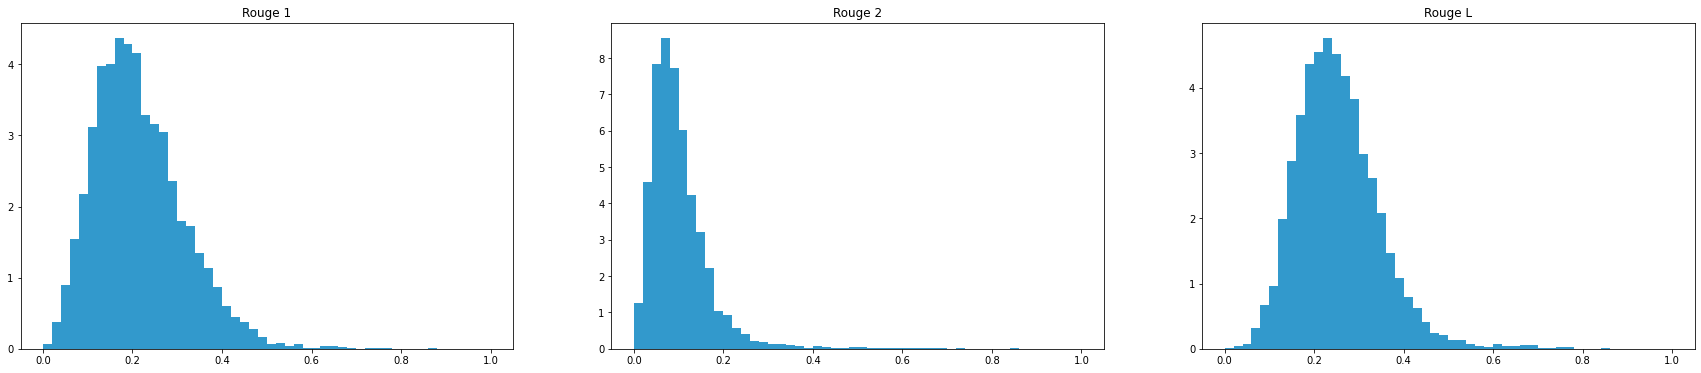

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(30,6))
ax1.set_title("Rouge 1")
ax2.set_title("Rouge 2")
ax3.set_title("Rouge L")
_ = ax1.hist(hist_1,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax2.hist(hist_2,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax3.hist(hist_l,bins=50,range=(0,1),density=True,color="#3299CC")

# Method 1: First k sentences

## hypper parameter tunning

### 2 sentences

0
rouge-1:  0.1851999059235984
rouge-2:  0.048880208125663696
rouge-l:  0.1703752592002925
Rouge-1:
 	 mean: 0.1852 
 	 Confidence interval: 90 %  [0.054 , 0.331]
Rouge-2:
 	 mean: 0.0489 
 	 Confidence interval: 90 %  [0.000 , 0.138]
Rouge-l:
 	 mean: 0.1704 
 	 Confidence interval: 90 %  [0.058 , 0.302]


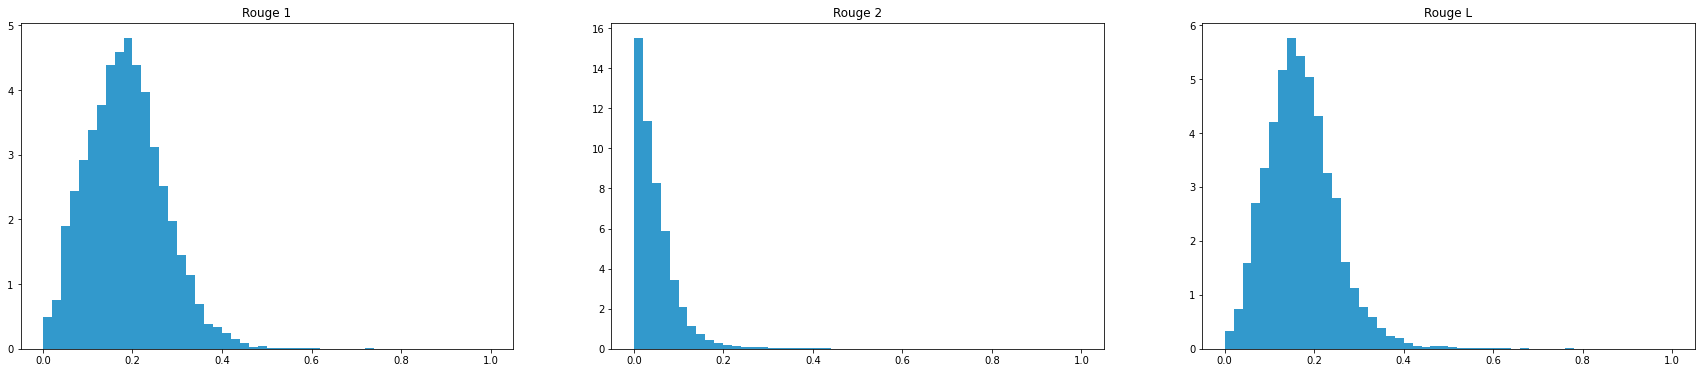

In [ ]:
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from rouge import Rouge

df = train_full
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
hist_1 = []
hist_2 = []
hist_l = []
for i in range(0,8000):
    if(i%20000==0):print(i)
    temp = sent_tokenize(df[i][1])
    if (len(temp)>=2):
        temp = temp[0] + ' ' +temp[1]
    else:
         temp = temp[0]
   
    scores1 = rouge.get_scores(temp,df[i][0])
    hist_1.append(float(scores1[0]['rouge-1']['f']))
    hist_2.append(float(scores1[0]['rouge-2']['f']))
    hist_l.append(float(scores1[0]['rouge-l']['f']))
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
    
rouge_1/=8000
rouge_2/=8000
rouge_l/=8000

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

import matplotlib.pyplot as plt
import numpy as np

def get_conf_int(hist,alpha):
    # confidence intervals
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(hist, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(hist, p))
    return lower,upper


alpha = 0.9
lower1,upper1 = get_conf_int(hist_1,alpha)
lower2,upper2 = get_conf_int(hist_2,alpha)
lower3,upper3 = get_conf_int(hist_l,alpha)

print('Rouge-1:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_1,alpha*100, lower1, upper1))
print('Rouge-2:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_2,alpha*100, lower2, upper2))
print('Rouge-l:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_l,alpha*100, lower3, upper3))

import matplotlib.pyplot as plt

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(30,6))
ax1.set_title("Rouge 1")
ax2.set_title("Rouge 2")
ax3.set_title("Rouge L")
_ = ax1.hist(hist_1,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax2.hist(hist_2,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax3.hist(hist_l,bins=50,range=(0,1),density=True,color="#3299CC")

### 3 sentences

0
rouge-1:  0.23668189926439348
rouge-2:  0.06443886565904546
rouge-l:  0.20565950512361217
Rouge-1:
 	 mean: 0.2367 
 	 Confidence interval: 90 %  [0.093 , 0.387]
Rouge-2:
 	 mean: 0.0644 
 	 Confidence interval: 90 %  [0.000 , 0.173]
Rouge-l:
 	 mean: 0.2057 
 	 Confidence interval: 90 %  [0.088 , 0.348]


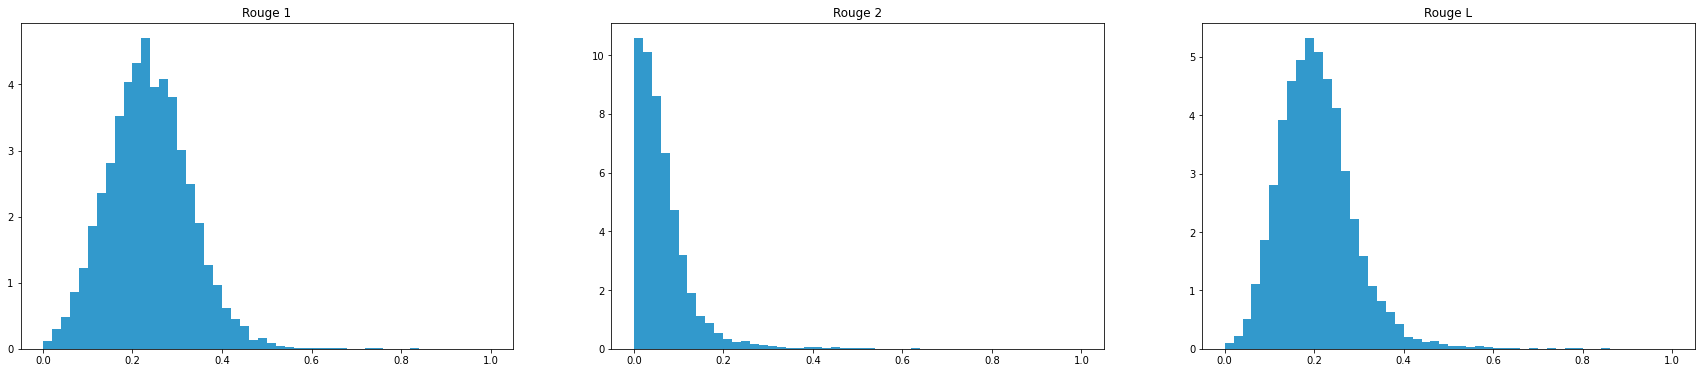

In [ ]:
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from rouge import Rouge

df = train_full
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
hist_1 = []
hist_2 = []
hist_l = []
for i in range(0,8000):
    if(i%20000==0):print(i)
    temp = sent_tokenize(df[i][1])
    if (len(temp)>=3):
        temp = temp[0] + ' ' +temp[1] + ' ' +temp[2]
    
    else:
        if (len(temp)>=2):
            temp = temp[0] + ' ' +temp[1]
        else:
            temp = temp[0]
   
    scores1 = rouge.get_scores(temp,df[i][0])
    hist_1.append(float(scores1[0]['rouge-1']['f']))
    hist_2.append(float(scores1[0]['rouge-2']['f']))
    hist_l.append(float(scores1[0]['rouge-l']['f']))
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
    
rouge_1/=8000
rouge_2/=8000
rouge_l/=8000

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

import matplotlib.pyplot as plt
import numpy as np

def get_conf_int(hist,alpha):
    # confidence intervals
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(hist, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(hist, p))
    return lower,upper


alpha = 0.9
lower1,upper1 = get_conf_int(hist_1,alpha)
lower2,upper2 = get_conf_int(hist_2,alpha)
lower3,upper3 = get_conf_int(hist_l,alpha)

print('Rouge-1:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_1,alpha*100, lower1, upper1))
print('Rouge-2:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_2,alpha*100, lower2, upper2))
print('Rouge-l:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_l,alpha*100, lower3, upper3))

import matplotlib.pyplot as plt

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(30,6))
ax1.set_title("Rouge 1")
ax2.set_title("Rouge 2")
ax3.set_title("Rouge L")
_ = ax1.hist(hist_1,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax2.hist(hist_2,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax3.hist(hist_l,bins=50,range=(0,1),density=True,color="#3299CC")

### 4 sentences

0
rouge-1:  0.274293367231644
rouge-2:  0.07701281385961603
rouge-l:  0.23031816220603152
Rouge-1:
 	 mean: 0.2743 
 	 Confidence interval: 90 %  [0.126 , 0.423]
Rouge-2:
 	 mean: 0.0770 
 	 Confidence interval: 90 %  [0.006 , 0.202]
Rouge-l:
 	 mean: 0.2303 
 	 Confidence interval: 90 %  [0.106 , 0.377]


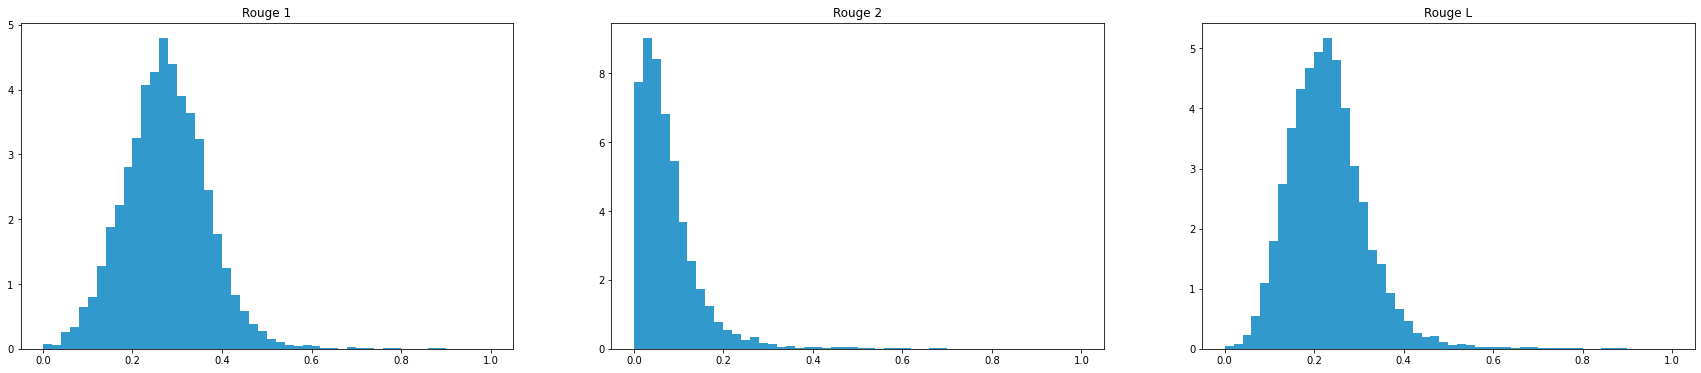

In [ ]:
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from rouge import Rouge

df = train_full
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
hist_1 = []
hist_2 = []
hist_l = []
for i in range(0,8000):
    if(i%20000==0):print(i)
    temp = sent_tokenize(df[i][1])
    if (len(temp)>= 4):
        temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3]
    else:
        if (len(temp)>=3):
            temp = temp[0] + ' ' +temp[1] + ' ' +temp[2]
        
        else:
            if (len(temp)>=2):
                temp = temp[0] + ' ' +temp[1]
            else:
                temp = temp[0]
   
    scores1 = rouge.get_scores(temp,df[i][0])
    hist_1.append(float(scores1[0]['rouge-1']['f']))
    hist_2.append(float(scores1[0]['rouge-2']['f']))
    hist_l.append(float(scores1[0]['rouge-l']['f']))
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
    
rouge_1/=8000
rouge_2/=8000
rouge_l/=8000

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

import matplotlib.pyplot as plt
import numpy as np

def get_conf_int(hist,alpha):
    # confidence intervals
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(hist, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(hist, p))
    return lower,upper


alpha = 0.9
lower1,upper1 = get_conf_int(hist_1,alpha)
lower2,upper2 = get_conf_int(hist_2,alpha)
lower3,upper3 = get_conf_int(hist_l,alpha)

print('Rouge-1:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_1,alpha*100, lower1, upper1))
print('Rouge-2:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_2,alpha*100, lower2, upper2))
print('Rouge-l:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_l,alpha*100, lower3, upper3))

import matplotlib.pyplot as plt

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(30,6))
ax1.set_title("Rouge 1")
ax2.set_title("Rouge 2")
ax3.set_title("Rouge L")
_ = ax1.hist(hist_1,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax2.hist(hist_2,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax3.hist(hist_l,bins=50,range=(0,1),density=True,color="#3299CC")

### 5 sentences

0
rouge-1:  0.30229302393838203
rouge-2:  0.08732275671293016
rouge-l:  0.24837137034093762
Rouge-1:
 	 mean: 0.3023 
 	 Confidence interval: 90 %  [0.154 , 0.451]
Rouge-2:
 	 mean: 0.0873 
 	 Confidence interval: 90 %  [0.009 , 0.226]
Rouge-l:
 	 mean: 0.2484 
 	 Confidence interval: 90 %  [0.122 , 0.403]


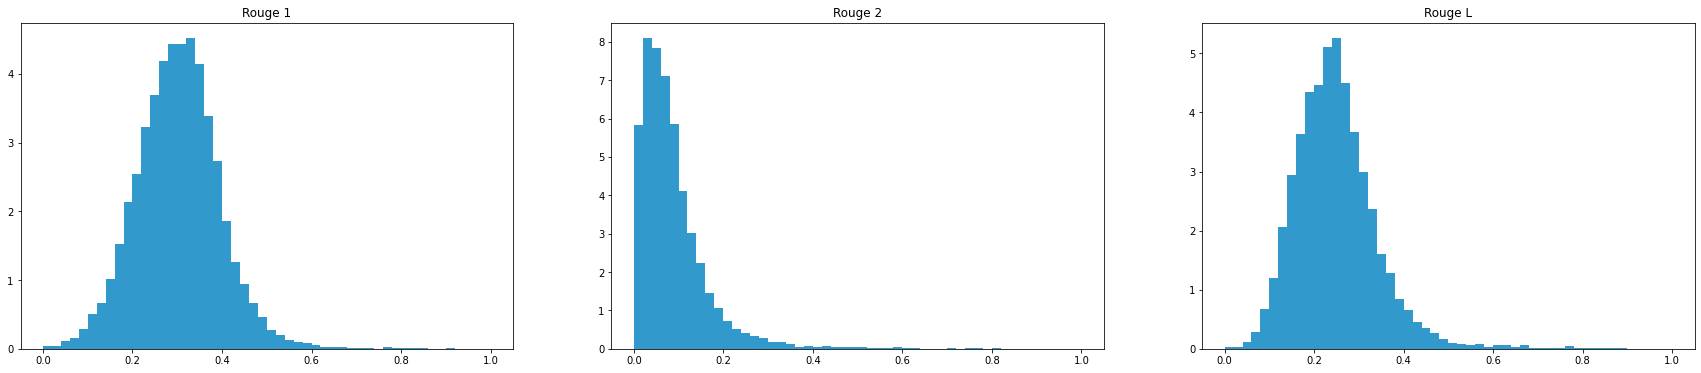

In [ ]:
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from rouge import Rouge

df = train_full
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
hist_1 = []
hist_2 = []
hist_l = []
for i in range(0,8000):
    if(i%20000==0):print(i)
    temp = sent_tokenize(df[i][1])
    if (len(temp)>=5):
        temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3] + ' ' +temp[4]
    else:
        if (len(temp)>= 4):
            temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3]
        else:
            if (len(temp)>=3):
                temp = temp[0] + ' ' +temp[1] + ' ' +temp[2]
            
            else:
                if (len(temp)>=2):
                    temp = temp[0] + ' ' +temp[1]
                else:
                    temp = temp[0]
   
    scores1 = rouge.get_scores(temp,df[i][0])
    hist_1.append(float(scores1[0]['rouge-1']['f']))
    hist_2.append(float(scores1[0]['rouge-2']['f']))
    hist_l.append(float(scores1[0]['rouge-l']['f']))
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
    
rouge_1/=8000
rouge_2/=8000
rouge_l/=8000

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

import matplotlib.pyplot as plt
import numpy as np

def get_conf_int(hist,alpha):
    # confidence intervals
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(hist, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(hist, p))
    return lower,upper


alpha = 0.9
lower1,upper1 = get_conf_int(hist_1,alpha)
lower2,upper2 = get_conf_int(hist_2,alpha)
lower3,upper3 = get_conf_int(hist_l,alpha)

print('Rouge-1:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_1,alpha*100, lower1, upper1))
print('Rouge-2:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_2,alpha*100, lower2, upper2))
print('Rouge-l:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_l,alpha*100, lower3, upper3))

import matplotlib.pyplot as plt

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(30,6))
ax1.set_title("Rouge 1")
ax2.set_title("Rouge 2")
ax3.set_title("Rouge L")
_ = ax1.hist(hist_1,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax2.hist(hist_2,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax3.hist(hist_l,bins=50,range=(0,1),density=True,color="#3299CC")

### 6 sentences

0
rouge-1:  0.32300099256534376
rouge-2:  0.09564245714504331
rouge-l:  0.26192540917881246
Rouge-1:
 	 mean: 0.3230 
 	 Confidence interval: 90 %  [0.175 , 0.468]
Rouge-2:
 	 mean: 0.0956 
 	 Confidence interval: 90 %  [0.012 , 0.243]
Rouge-l:
 	 mean: 0.2619 
 	 Confidence interval: 90 %  [0.132 , 0.418]


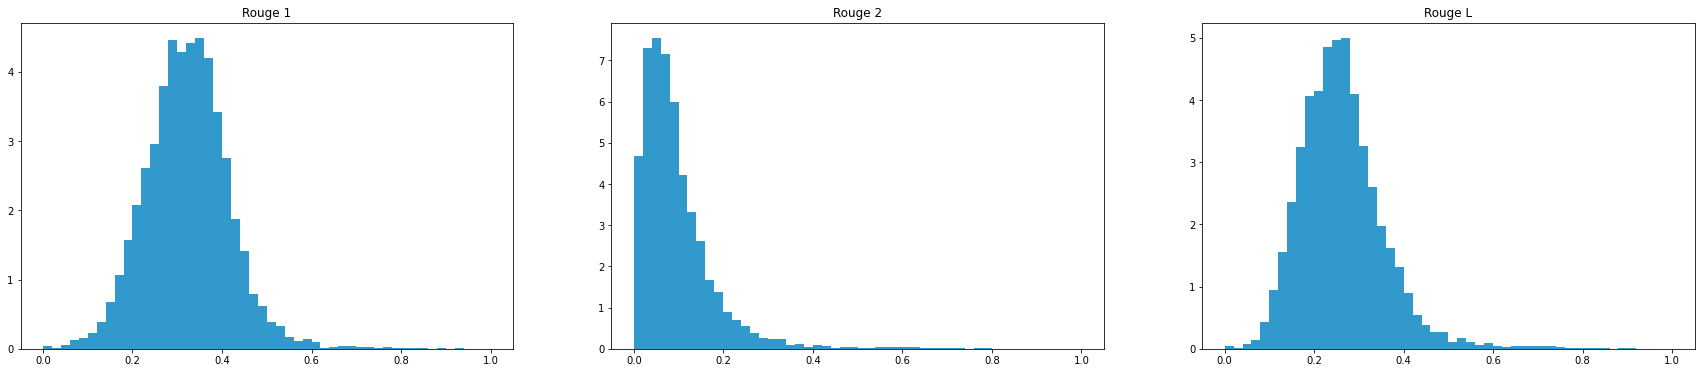

In [ ]:
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from rouge import Rouge

df = train_full
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
hist_1 = []
hist_2 = []
hist_l = []
for i in range(0,8000):
    if(i%20000==0):print(i)
    temp = sent_tokenize(df[i][1])
    if (len(temp)>=6):
        temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3] + ' ' +temp[4] + ' '+ temp[5]
    else:
        if (len(temp)>=5):
            temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3] + ' ' +temp[4]
        else:
            if (len(temp)>= 4):
                temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3]
            else:
                if (len(temp)>=3):
                    temp = temp[0] + ' ' +temp[1] + ' ' +temp[2]
                
                else:
                    if (len(temp)>=2):
                        temp = temp[0] + ' ' +temp[1]
                    else:
                        temp = temp[0]
   
    scores1 = rouge.get_scores(temp,df[i][0])
    hist_1.append(float(scores1[0]['rouge-1']['f']))
    hist_2.append(float(scores1[0]['rouge-2']['f']))
    hist_l.append(float(scores1[0]['rouge-l']['f']))
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
    
rouge_1/=8000
rouge_2/=8000
rouge_l/=8000

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

import matplotlib.pyplot as plt
import numpy as np

def get_conf_int(hist,alpha):
    # confidence intervals
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(hist, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(hist, p))
    return lower,upper


alpha = 0.9
lower1,upper1 = get_conf_int(hist_1,alpha)
lower2,upper2 = get_conf_int(hist_2,alpha)
lower3,upper3 = get_conf_int(hist_l,alpha)

print('Rouge-1:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_1,alpha*100, lower1, upper1))
print('Rouge-2:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_2,alpha*100, lower2, upper2))
print('Rouge-l:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_l,alpha*100, lower3, upper3))

import matplotlib.pyplot as plt

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(30,6))
ax1.set_title("Rouge 1")
ax2.set_title("Rouge 2")
ax3.set_title("Rouge L")
_ = ax1.hist(hist_1,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax2.hist(hist_2,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax3.hist(hist_l,bins=50,range=(0,1),density=True,color="#3299CC")

### 7 sentences 

0
rouge-1:  0.33754239449523243
rouge-2:  0.10171413920223053
rouge-l:  0.27173523327642846
Rouge-1:
 	 mean: 0.3375 
 	 Confidence interval: 90 %  [0.192 , 0.485]
Rouge-2:
 	 mean: 0.1017 
 	 Confidence interval: 90 %  [0.015 , 0.254]
Rouge-l:
 	 mean: 0.2717 
 	 Confidence interval: 90 %  [0.139 , 0.432]


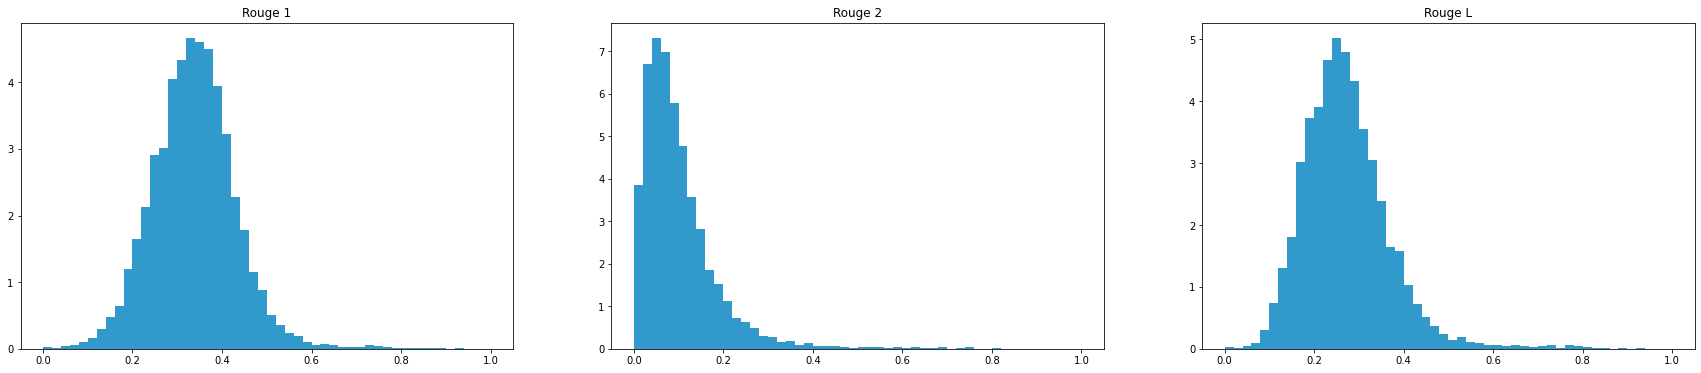

In [ ]:
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from rouge import Rouge

df = train_full
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
hist_1 = []
hist_2 = []
hist_l = []
for i in range(0,8000):
    if(i%20000==0):print(i)
    temp = sent_tokenize(df[i][1])
    if (len(temp)>=7):
        temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3] + ' ' +temp[4] + ' '+ temp[5]+ ' '+ temp[6]
    else:
        if (len(temp)>=6):
            temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3] + ' ' +temp[4] + ' '+ temp[5]
        else:
            if (len(temp)>=5):
                temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3] + ' ' +temp[4]
            else:
                if (len(temp)>= 4):
                    temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3]
                else:
                    if (len(temp)>=3):
                        temp = temp[0] + ' ' +temp[1] + ' ' +temp[2]
                    
                    else:
                        if (len(temp)>=2):
                            temp = temp[0] + ' ' +temp[1]
                        else:
                            temp = temp[0]
   
    scores1 = rouge.get_scores(temp,df[i][0])
    hist_1.append(float(scores1[0]['rouge-1']['f']))
    hist_2.append(float(scores1[0]['rouge-2']['f']))
    hist_l.append(float(scores1[0]['rouge-l']['f']))
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
    
rouge_1/=8000
rouge_2/=8000
rouge_l/=8000

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

import matplotlib.pyplot as plt
import numpy as np

def get_conf_int(hist,alpha):
    # confidence intervals
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(hist, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(hist, p))
    return lower,upper


alpha = 0.9
lower1,upper1 = get_conf_int(hist_1,alpha)
lower2,upper2 = get_conf_int(hist_2,alpha)
lower3,upper3 = get_conf_int(hist_l,alpha)

print('Rouge-1:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_1,alpha*100, lower1, upper1))
print('Rouge-2:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_2,alpha*100, lower2, upper2))
print('Rouge-l:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_l,alpha*100, lower3, upper3))

import matplotlib.pyplot as plt

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(30,6))
ax1.set_title("Rouge 1")
ax2.set_title("Rouge 2")
ax3.set_title("Rouge L")
_ = ax1.hist(hist_1,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax2.hist(hist_2,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax3.hist(hist_l,bins=50,range=(0,1),density=True,color="#3299CC")

### 8 sentences

0
rouge-1:  0.34797157288420144
rouge-2:  0.10690574864963837
rouge-l:  0.27964158519985494
Rouge-1:
 	 mean: 0.3480 
 	 Confidence interval: 90 %  [0.204 , 0.496]
Rouge-2:
 	 mean: 0.1069 
 	 Confidence interval: 90 %  [0.017 , 0.264]
Rouge-l:
 	 mean: 0.2796 
 	 Confidence interval: 90 %  [0.146 , 0.441]


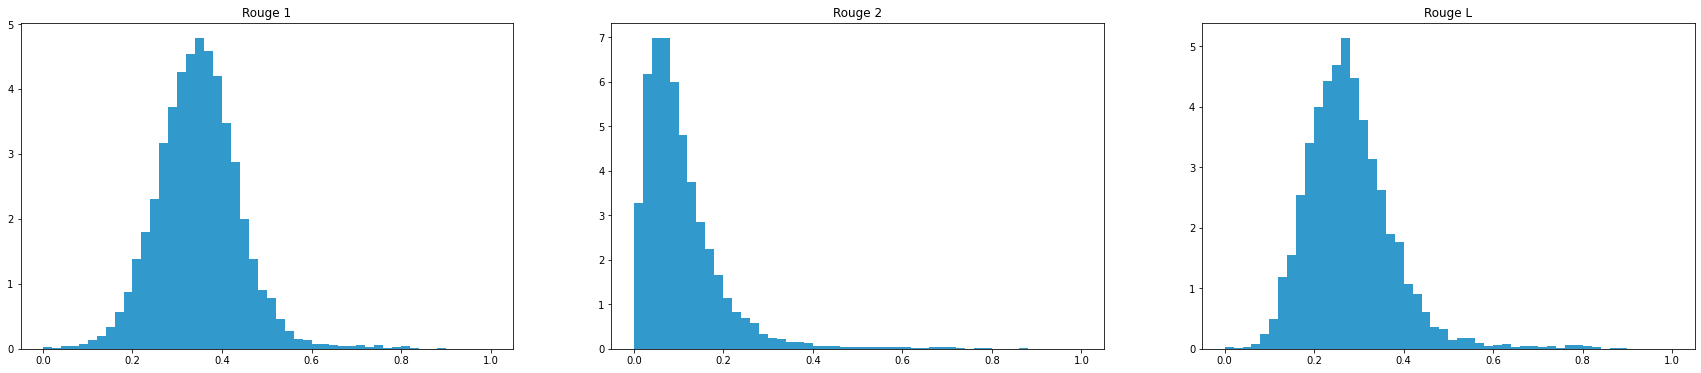

In [ ]:
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from rouge import Rouge

df = train_full
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
hist_1 = []
hist_2 = []
hist_l = []
for i in range(0,8000):
    if(i%20000==0):print(i)
    temp = sent_tokenize(df[i][1])
    if (len(temp)>=8):
        temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]
    else:
        if (len(temp)>=7):
            temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3] + ' ' +temp[4] + ' '+ temp[5]+ ' '+ temp[6]
        else:
            if (len(temp)>=6):
                temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3] + ' ' +temp[4] + ' '+ temp[5]
            else:
                if (len(temp)>=5):
                    temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3] + ' ' +temp[4]
                else:
                    if (len(temp)>= 4):
                        temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3]
                    else:
                        if (len(temp)>=3):
                            temp = temp[0] + ' ' +temp[1] + ' ' +temp[2]
                        
                        else:
                            if (len(temp)>=2):
                                temp = temp[0] + ' ' +temp[1]
                            else:
                                temp = temp[0]
                                
    scores1 = rouge.get_scores(temp,df[i][0])
    hist_1.append(float(scores1[0]['rouge-1']['f']))
    hist_2.append(float(scores1[0]['rouge-2']['f']))
    hist_l.append(float(scores1[0]['rouge-l']['f']))
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
    
rouge_1/=8000
rouge_2/=8000
rouge_l/=8000

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

import matplotlib.pyplot as plt
import numpy as np

def get_conf_int(hist,alpha):
    # confidence intervals
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(hist, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(hist, p))
    return lower,upper


alpha = 0.9
lower1,upper1 = get_conf_int(hist_1,alpha)
lower2,upper2 = get_conf_int(hist_2,alpha)
lower3,upper3 = get_conf_int(hist_l,alpha)

print('Rouge-1:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_1,alpha*100, lower1, upper1))
print('Rouge-2:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_2,alpha*100, lower2, upper2))
print('Rouge-l:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_l,alpha*100, lower3, upper3))

import matplotlib.pyplot as plt

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(30,6))
ax1.set_title("Rouge 1")
ax2.set_title("Rouge 2")
ax3.set_title("Rouge L")
_ = ax1.hist(hist_1,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax2.hist(hist_2,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax3.hist(hist_l,bins=50,range=(0,1),density=True,color="#3299CC")

### 9 sentences

0
rouge-1:  0.3545875709009131
rouge-2:  0.11065387726911315
rouge-l:  0.2851022831820263
Rouge-1:
 	 mean: 0.3546 
 	 Confidence interval: 90 %  [0.211 , 0.500]
Rouge-2:
 	 mean: 0.1107 
 	 Confidence interval: 90 %  [0.019 , 0.268]
Rouge-l:
 	 mean: 0.2851 
 	 Confidence interval: 90 %  [0.151 , 0.447]


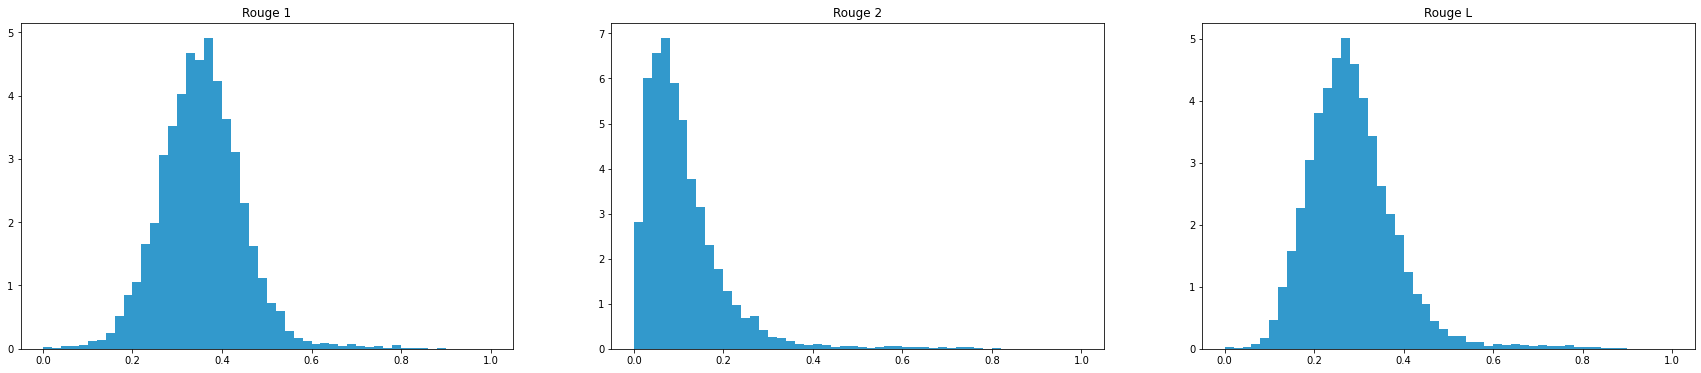

In [ ]:
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from rouge import Rouge

df = train_full
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
hist_1 = []
hist_2 = []
hist_l = []
for i in range(0,8000):
    if(i%20000==0):print(i)
    temp = sent_tokenize(df[i][1])
    if (len(temp)>=9 ):
        temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]+' '+temp[8]
    else:
        if (len(temp)>=8):
            temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]
        else:
            if (len(temp)>=7):
                temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3] + ' ' +temp[4] + ' '+ temp[5]+ ' '+ temp[6]
            else:
                if (len(temp)>=6):
                    temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3] + ' ' +temp[4] + ' '+ temp[5]
                else:
                    if (len(temp)>=5):
                        temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3] + ' ' +temp[4]
                    else:
                        if (len(temp)>= 4):
                            temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3]
                        else:
                            if (len(temp)>=3):
                                temp = temp[0] + ' ' +temp[1] + ' ' +temp[2]
                            
                            else:
                                if (len(temp)>=2):
                                    temp = temp[0] + ' ' +temp[1]
                                else:
                                    temp = temp[0]
                                
    scores1 = rouge.get_scores(temp,df[i][0])
    hist_1.append(float(scores1[0]['rouge-1']['f']))
    hist_2.append(float(scores1[0]['rouge-2']['f']))
    hist_l.append(float(scores1[0]['rouge-l']['f']))
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
    
rouge_1/=8000
rouge_2/=8000
rouge_l/=8000

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

import matplotlib.pyplot as plt
import numpy as np

def get_conf_int(hist,alpha):
    # confidence intervals
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(hist, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(hist, p))
    return lower,upper


alpha = 0.9
lower1,upper1 = get_conf_int(hist_1,alpha)
lower2,upper2 = get_conf_int(hist_2,alpha)
lower3,upper3 = get_conf_int(hist_l,alpha)

print('Rouge-1:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_1,alpha*100, lower1, upper1))
print('Rouge-2:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_2,alpha*100, lower2, upper2))
print('Rouge-l:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_l,alpha*100, lower3, upper3))

import matplotlib.pyplot as plt

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(30,6))
ax1.set_title("Rouge 1")
ax2.set_title("Rouge 2")
ax3.set_title("Rouge L")
_ = ax1.hist(hist_1,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax2.hist(hist_2,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax3.hist(hist_l,bins=50,range=(0,1),density=True,color="#3299CC")

### 10 sentences

0
rouge-1:  0.3584689071597549
rouge-2:  0.11334649018729859
rouge-l:  0.2888953098274339
Rouge-1:
 	 mean: 0.3585 
 	 Confidence interval: 90 %  [0.217 , 0.500]
Rouge-2:
 	 mean: 0.1133 
 	 Confidence interval: 90 %  [0.020 , 0.269]
Rouge-l:
 	 mean: 0.2889 
 	 Confidence interval: 90 %  [0.153 , 0.448]


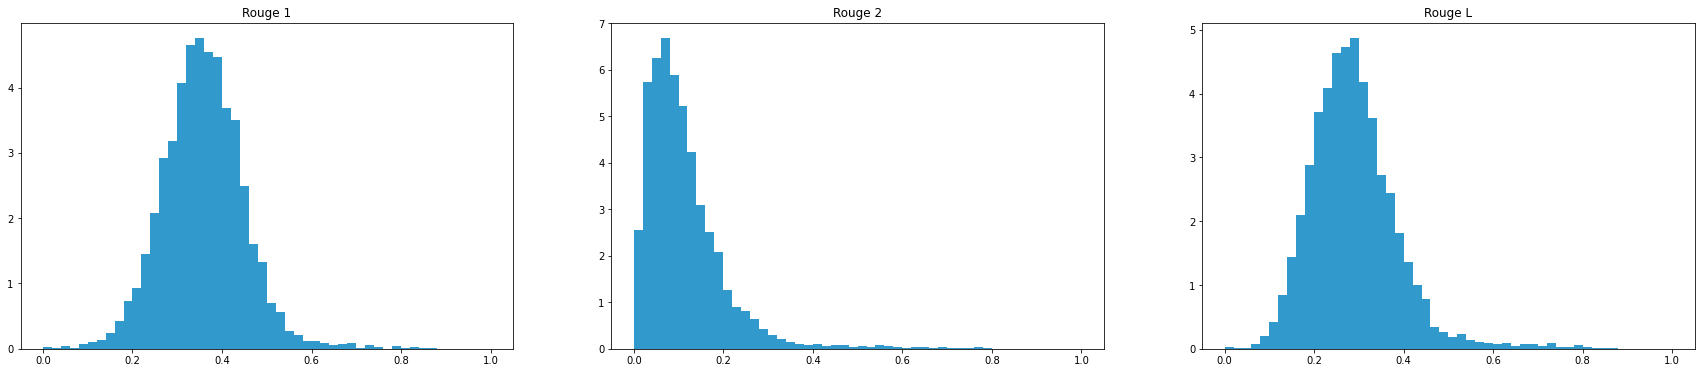

In [ ]:
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from rouge import Rouge

df = train_full
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
hist_1 = []
hist_2 = []
hist_l = []
for i in range(0,8000):
    if(i%20000==0):print(i)
    temp = sent_tokenize(df[i][1])
    if (len(temp)>=10):
        temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]+' '+temp[8]+' '+temp[9]
    else:    
        if (len(temp)>=9 ):
            temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]+' '+temp[8]
        else:
            if (len(temp)>=8):
                temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]
            else:
                if (len(temp)>=7):
                    temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3] + ' ' +temp[4] + ' '+ temp[5]+ ' '+ temp[6]
                else:
                    if (len(temp)>=6):
                        temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3] + ' ' +temp[4] + ' '+ temp[5]
                    else:
                        if (len(temp)>=5):
                            temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3] + ' ' +temp[4]
                        else:
                            if (len(temp)>= 4):
                                temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3]
                            else:
                                if (len(temp)>=3):
                                    temp = temp[0] + ' ' +temp[1] + ' ' +temp[2]
                                
                                else:
                                    if (len(temp)>=2):
                                        temp = temp[0] + ' ' +temp[1]
                                    else:
                                        temp = temp[0]
                                
    scores1 = rouge.get_scores(temp,df[i][0])
    hist_1.append(float(scores1[0]['rouge-1']['f']))
    hist_2.append(float(scores1[0]['rouge-2']['f']))
    hist_l.append(float(scores1[0]['rouge-l']['f']))
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
    
rouge_1/=8000
rouge_2/=8000
rouge_l/=8000

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

import matplotlib.pyplot as plt
import numpy as np

def get_conf_int(hist,alpha):
    # confidence intervals
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(hist, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(hist, p))
    return lower,upper


alpha = 0.9
lower1,upper1 = get_conf_int(hist_1,alpha)
lower2,upper2 = get_conf_int(hist_2,alpha)
lower3,upper3 = get_conf_int(hist_l,alpha)

print('Rouge-1:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_1,alpha*100, lower1, upper1))
print('Rouge-2:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_2,alpha*100, lower2, upper2))
print('Rouge-l:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_l,alpha*100, lower3, upper3))

import matplotlib.pyplot as plt

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(30,6))
ax1.set_title("Rouge 1")
ax2.set_title("Rouge 2")
ax3.set_title("Rouge L")
_ = ax1 .hist(hist_1,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax2.hist(hist_2,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax3.hist(hist_l,bins=50,range=(0,1),density=True,color="#3299CC")

### 11 sentences

0
rouge-1:  0.36021627050061344
rouge-2:  0.11552148742543034
rouge-l:  0.2918649637168507
Rouge-1:
 	 mean: 0.3602 
 	 Confidence interval: 90 %  [0.218 , 0.501]
Rouge-2:
 	 mean: 0.1155 
 	 Confidence interval: 90 %  [0.020 , 0.269]
Rouge-l:
 	 mean: 0.2919 
 	 Confidence interval: 90 %  [0.156 , 0.451]


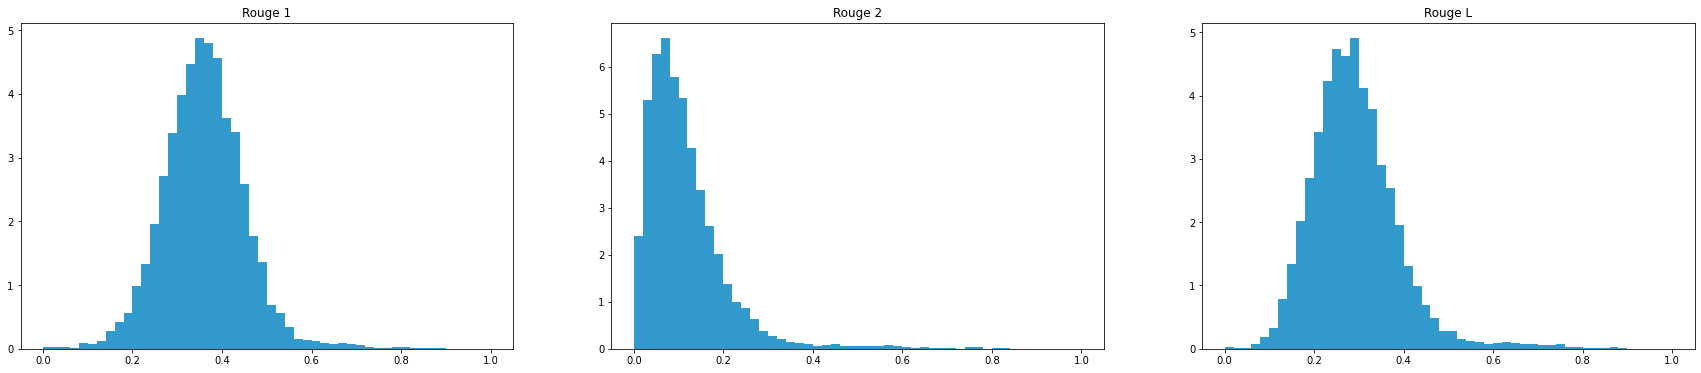

In [ ]:
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from rouge import Rouge

df = train_full
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
hist_1 = []
hist_2 = []
hist_l = []
for i in range(0,8000):
    if(i%20000==0):print(i)
    temp = sent_tokenize(df[i][1])
    if (len(temp)>=11):
         temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]+' '+temp[8]+' '+temp[9]+' '+temp[10]
    else:
        if (len(temp)>=10):
            temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]+' '+temp[8]+' '+temp[9]
        else:    
            if (len(temp)>=9 ):
                temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]+' '+temp[8]
            else:
                if (len(temp)>=8):
                    temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]
                else:
                    if (len(temp)>=7):
                        temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3] + ' ' +temp[4] + ' '+ temp[5]+ ' '+ temp[6]
                    else:
                        if (len(temp)>=6):
                            temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3] + ' ' +temp[4] + ' '+ temp[5]
                        else:
                            if (len(temp)>=5):
                                temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3] + ' ' +temp[4]
                            else:
                                if (len(temp)>= 4):
                                    temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3]
                                else:
                                    if (len(temp)>=3):
                                        temp = temp[0] + ' ' +temp[1] + ' ' +temp[2]
                                    
                                    else:
                                        if (len(temp)>=2):
                                            temp = temp[0] + ' ' +temp[1]
                                        else:
                                            temp = temp[0]
                                
    scores1 = rouge.get_scores(temp,df[i][0])
    hist_1.append(float(scores1[0]['rouge-1']['f']))
    hist_2.append(float(scores1[0]['rouge-2']['f']))
    hist_l.append(float(scores1[0]['rouge-l']['f']))
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
    
rouge_1/=8000
rouge_2/=8000
rouge_l/=8000

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

import matplotlib.pyplot as plt
import numpy as np

def get_conf_int(hist,alpha):
    # confidence intervals
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(hist, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(hist, p))
    return lower,upper


alpha = 0.9
lower1,upper1 = get_conf_int(hist_1,alpha)
lower2,upper2 = get_conf_int(hist_2,alpha)
lower3,upper3 = get_conf_int(hist_l,alpha)

print('Rouge-1:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_1,alpha*100, lower1, upper1))
print('Rouge-2:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_2,alpha*100, lower2, upper2))
print('Rouge-l:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_l,alpha*100, lower3, upper3))

import matplotlib.pyplot as plt

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(30,6))
ax1.set_title("Rouge 1")
ax2.set_title("Rouge 2")
ax3.set_title("Rouge L")
_ = ax1 .hist(hist_1,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax2.hist(hist_2,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax3.hist(hist_l,bins=50,range=(0,1),density=True,color="#3299CC")

### 12 sentences

0
rouge-1:  0.36073818122351176
rouge-2:  0.1174025394859992
rouge-l:  0.29427698131310215
Rouge-1:
 	 mean: 0.3607 
 	 Confidence interval: 90 %  [0.218 , 0.500]
Rouge-2:
 	 mean: 0.1174 
 	 Confidence interval: 90 %  [0.022 , 0.269]
Rouge-l:
 	 mean: 0.2943 
 	 Confidence interval: 90 %  [0.158 , 0.453]


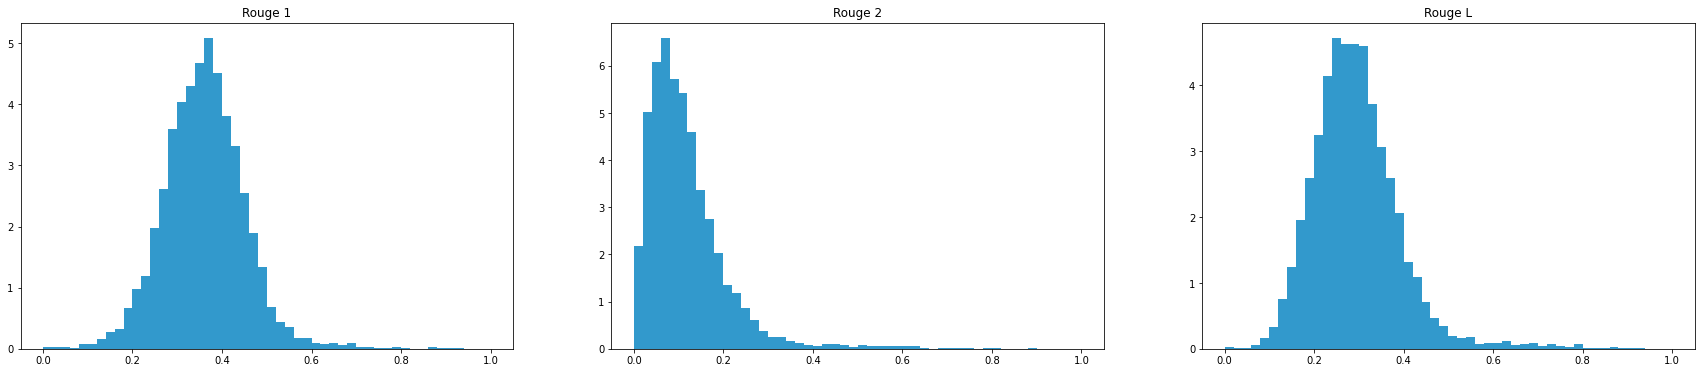

In [ ]:
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from rouge import Rouge

df = train_full
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
hist_1 = []
hist_2 = []
hist_l = []
for i in range(0,8000):
    if(i%20000==0):print(i)
    temp = sent_tokenize(df[i][1])
    if (len(temp) >=12):
         temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]+' '+temp[8]+' '+temp[9]+' '+temp[10]+' '+temp[11]

    else:
        if (len(temp)>=11):
            temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]+' '+temp[8]+' '+temp[9]+' '+temp[10]
        else:
            if (len(temp)>=10):
                temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]+' '+temp[8]+' '+temp[9]
            else:    
                if (len(temp)>=9 ):
                    temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]+' '+temp[8]
                else:
                    if (len(temp)>=8):
                        temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]
                    else:
                        if (len(temp)>=7):
                            temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3] + ' ' +temp[4] + ' '+ temp[5]+ ' '+ temp[6]
                        else:
                            if (len(temp)>=6):
                                temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3] + ' ' +temp[4] + ' '+ temp[5]
                            else:
                                if (len(temp)>=5):
                                    temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3] + ' ' +temp[4]
                                else:
                                    if (len(temp)>= 4):
                                        temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3]
                                    else:
                                        if (len(temp)>=3):
                                            temp = temp[0] + ' ' +temp[1] + ' ' +temp[2]
                                        
                                        else:
                                            if (len(temp)>=2):
                                                temp = temp[0] + ' ' +temp[1]
                                            else:
                                                temp = temp[0]
                                
    scores1 = rouge.get_scores(temp,df[i][0])
    hist_1.append(float(scores1[0]['rouge-1']['f']))
    hist_2.append(float(scores1[0]['rouge-2']['f']))
    hist_l.append(float(scores1[0]['rouge-l']['f']))
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
    
rouge_1/=8000
rouge_2/=8000
rouge_l/=8000

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

import matplotlib.pyplot as plt
import numpy as np

def get_conf_int(hist,alpha):
    # confidence intervals
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(hist, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(hist, p))
    return lower,upper


alpha = 0.9
lower1,upper1 = get_conf_int(hist_1,alpha)
lower2,upper2 = get_conf_int(hist_2,alpha)
lower3,upper3 = get_conf_int(hist_l,alpha)

print('Rouge-1:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_1,alpha*100, lower1, upper1))
print('Rouge-2:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_2,alpha*100, lower2, upper2))
print('Rouge-l:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_l,alpha*100, lower3, upper3))

import matplotlib.pyplot as plt

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(30,6))
ax1.set_title("Rouge 1")
ax2.set_title("Rouge 2")
ax3.set_title("Rouge L")
_ = ax1 .hist(hist_1,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax2.hist(hist_2,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax3.hist(hist_l,bins=50,range=(0,1),density=True,color="#3299CC")

### 13 sentences

0
rouge-1:  0.3597602564928311
rouge-2:  0.11870726639055527
rouge-l:  0.2957867039046145
Rouge-1:
 	 mean: 0.3598 
 	 Confidence interval: 90 %  [0.218 , 0.498]
Rouge-2:
 	 mean: 0.1187 
 	 Confidence interval: 90 %  [0.023 , 0.270]
Rouge-l:
 	 mean: 0.2958 
 	 Confidence interval: 90 %  [0.161 , 0.455]


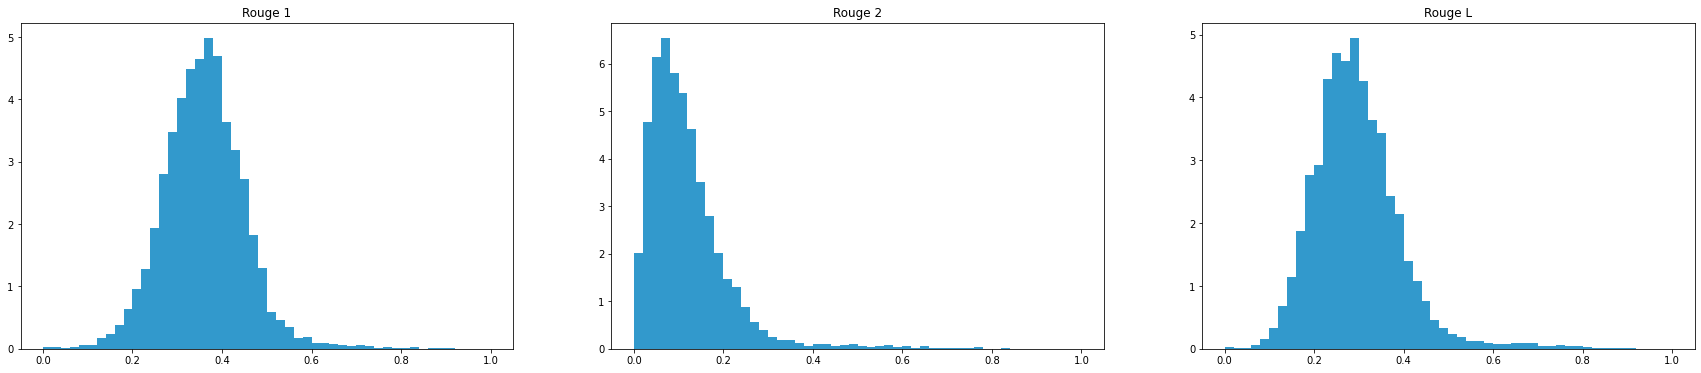

In [ ]:
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from rouge import Rouge

df = train_full
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
hist_1 = []
hist_2 = []
hist_l = []
for i in range(0,8000):
    if(i%20000==0):print(i)
    temp = sent_tokenize(df[i][1])
    if (len(temp)>=13):
        temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]+' '+temp[8]+' '+temp[9]+' '+temp[10]+' '+temp[11]+' '+temp[12]
    else:
        if (len(temp) >=12):
            temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]+' '+temp[8]+' '+temp[9]+' '+temp[10]+' '+temp[11]
        else:
            if (len(temp)>=11):
                temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]+' '+temp[8]+' '+temp[9]+' '+temp[10]
            else:
                if (len(temp)>=10):
                    temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]+' '+temp[8]+' '+temp[9]
                else:    
                    if (len(temp)>=9 ):
                        temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]+' '+temp[8]
                    else:
                        if (len(temp)>=8):
                            temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]
                        else:
                            if (len(temp)>=7):
                                temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3] + ' ' +temp[4] + ' '+ temp[5]+ ' '+ temp[6]
                            else:
                                if (len(temp)>=6):
                                    temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3] + ' ' +temp[4] + ' '+ temp[5]
                                else:
                                    if (len(temp)>=5):
                                        temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3] + ' ' +temp[4]
                                    else:
                                        if (len(temp)>= 4):
                                            temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3]
                                        else:
                                            if (len(temp)>=3):
                                                temp = temp[0] + ' ' +temp[1] + ' ' +temp[2]
                                            
                                            else:
                                                if (len(temp)>=2):
                                                    temp = temp[0] + ' ' +temp[1]
                                                else:
                                                    temp = temp[0]
                                
    scores1 = rouge.get_scores(temp,df[i][0])
    hist_1.append(float(scores1[0]['rouge-1']['f']))
    hist_2.append(float(scores1[0]['rouge-2']['f']))
    hist_l.append(float(scores1[0]['rouge-l']['f']))
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
    
rouge_1/=8000
rouge_2/=8000
rouge_l/=8000

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

import matplotlib.pyplot as plt
import numpy as np

def get_conf_int(hist,alpha):
    # confidence intervals
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(hist, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(hist, p))
    return lower,upper


alpha = 0.9
lower1,upper1 = get_conf_int(hist_1,alpha)
lower2,upper2 = get_conf_int(hist_2,alpha)
lower3,upper3 = get_conf_int(hist_l,alpha)

print('Rouge-1:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_1,alpha*100, lower1, upper1))
print('Rouge-2:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_2,alpha*100, lower2, upper2))
print('Rouge-l:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_l,alpha*100, lower3, upper3))

import matplotlib.pyplot as plt

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(30,6))
ax1.set_title("Rouge 1")
ax2.set_title("Rouge 2")
ax3.set_title("Rouge L")
_ = ax1 .hist(hist_1,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax2.hist(hist_2,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax3.hist(hist_l,bins=50,range=(0,1),density=True,color="#3299CC")

### 14 sentences

0
rouge-1:  0.35791268957720235
rouge-2:  0.11983921431285838
rouge-l:  0.29696470172733397
Rouge-1:
 	 mean: 0.3579 
 	 Confidence interval: 90 %  [0.216 , 0.497]
Rouge-2:
 	 mean: 0.1198 
 	 Confidence interval: 90 %  [0.024 , 0.266]
Rouge-l:
 	 mean: 0.2970 
 	 Confidence interval: 90 %  [0.163 , 0.454]


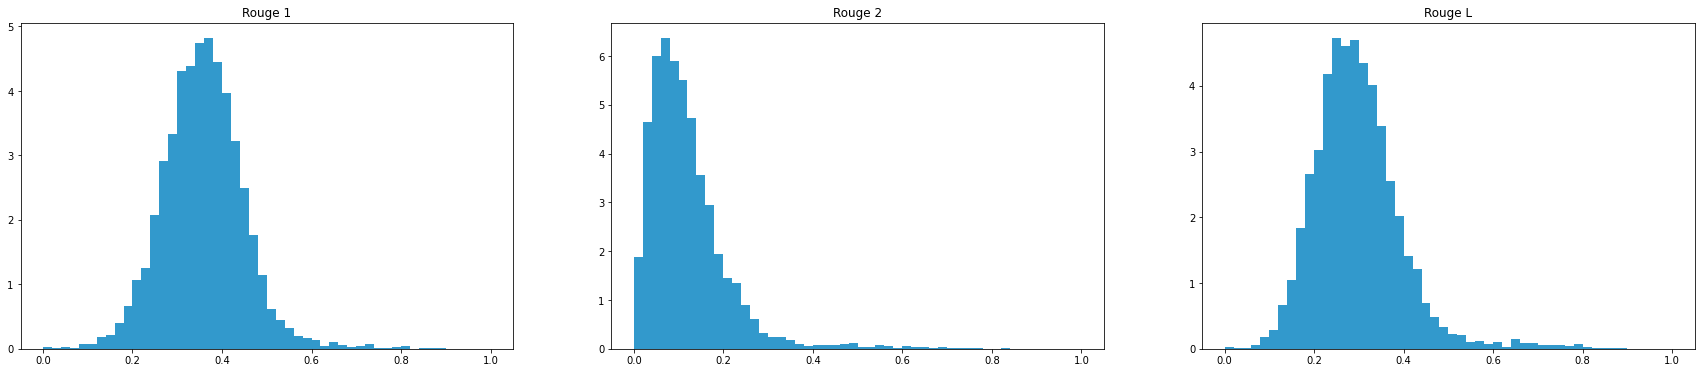

In [ ]:
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from rouge import Rouge

df = train_full
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
hist_1 = []
hist_2 = []
hist_l = []
for i in range(0,8000):
    if(i%20000==0):print(i)
    temp = sent_tokenize(df[i][1])
    if (len(temp)>= 14):
        temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]+' '+temp[8]+' '+temp[9]+' '+temp[10]+' '+temp[11]+' '+temp[12]+' '+temp[13]

    else:
        if (len(temp)>=13):
            temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]+' '+temp[8]+' '+temp[9]+' '+temp[10]+' '+temp[11]+' '+temp[12]
        else:
            if (len(temp) >=12):
                temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]+' '+temp[8]+' '+temp[9]+' '+temp[10]+' '+temp[11]
            else:
                if (len(temp)>=11):
                    temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]+' '+temp[8]+' '+temp[9]+' '+temp[10]
                else:
                    if (len(temp)>=10):
                        temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]+' '+temp[8]+' '+temp[9]
                    else:    
                        if (len(temp)>=9 ):
                            temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]+' '+temp[8]
                        else:
                            if (len(temp)>=8):
                                temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]
                            else:
                                if (len(temp)>=7):
                                    temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3] + ' ' +temp[4] + ' '+ temp[5]+ ' '+ temp[6]
                                else:
                                    if (len(temp)>=6):
                                        temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3] + ' ' +temp[4] + ' '+ temp[5]
                                    else:
                                        if (len(temp)>=5):
                                            temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3] + ' ' +temp[4]
                                        else:
                                            if (len(temp)>= 4):
                                                temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3]
                                            else:
                                                if (len(temp)>=3):
                                                    temp = temp[0] + ' ' +temp[1] + ' ' +temp[2]
                                                
                                                else:
                                                    if (len(temp)>=2):
                                                        temp = temp[0] + ' ' +temp[1]
                                                    else:
                                                        temp = temp[0]
                                
    scores1 = rouge.get_scores(temp,df[i][0])
    hist_1.append(float(scores1[0]['rouge-1']['f']))
    hist_2.append(float(scores1[0]['rouge-2']['f']))
    hist_l.append(float(scores1[0]['rouge-l']['f']))
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
    
rouge_1/=8000
rouge_2/=8000
rouge_l/=8000

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

import matplotlib.pyplot as plt
import numpy as np

def get_conf_int(hist,alpha):
    # confidence intervals
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(hist, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(hist, p))
    return lower,upper


alpha = 0.9
lower1,upper1 = get_conf_int(hist_1,alpha)
lower2,upper2 = get_conf_int(hist_2,alpha)
lower3,upper3 = get_conf_int(hist_l,alpha)

print('Rouge-1:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_1,alpha*100, lower1, upper1))
print('Rouge-2:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_2,alpha*100, lower2, upper2))
print('Rouge-l:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_l,alpha*100, lower3, upper3))

import matplotlib.pyplot as plt

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(30,6))
ax1.set_title("Rouge 1")
ax2.set_title("Rouge 2")
ax3.set_title("Rouge L")
_ = ax1 .hist(hist_1,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax2.hist(hist_2,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax3.hist(hist_l,bins=50,range=(0,1),density=True,color="#3299CC")

## test with 12 sentences

0
rouge-1:  0.3611958272648095
rouge-2:  0.11754894496753157
rouge-l:  0.2958174847902394
average length in char:  1770.5120953397368
Rouge-1:
 	 mean: 0.3612 
 	 Confidence interval: 90 %  [0.220 , 0.500]
Rouge-2:
 	 mean: 0.1175 
 	 Confidence interval: 90 %  [0.022 , 0.266]
Rouge-l:
 	 mean: 0.2958 
 	 Confidence interval: 90 %  [0.162 , 0.453]


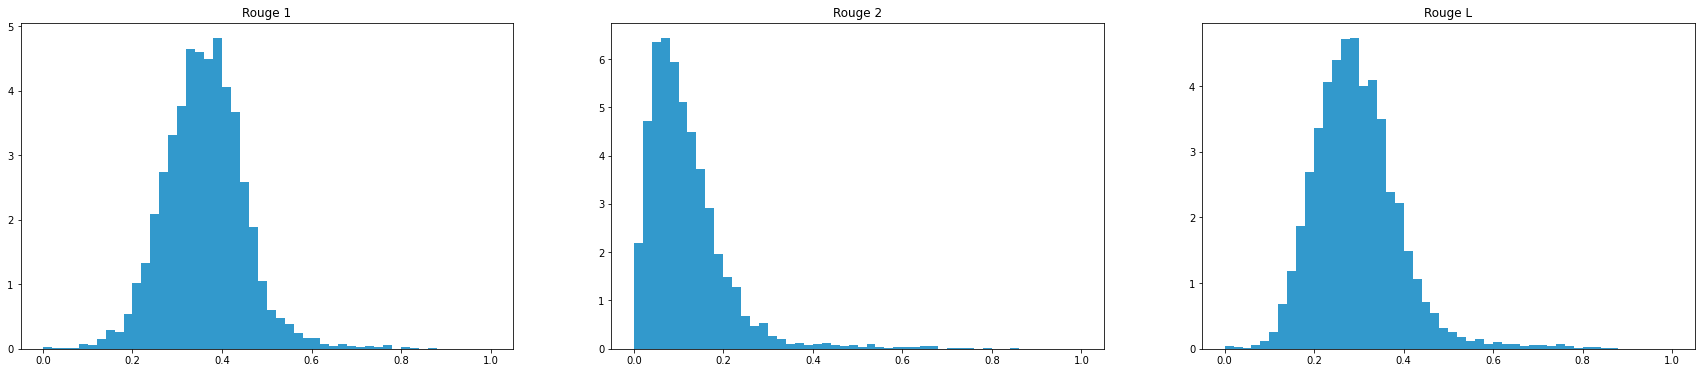

In [ ]:
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from rouge import Rouge
char_len = 0
df = test
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
hist_1 = []
hist_2 = []
hist_l = []
for i in range(0,len(df)):
    if(i%20000==0):print(i)
    temp = sent_tokenize(df[i][1])
    if (len(temp) >=12):
         temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]+' '+temp[8]+' '+temp[9]+' '+temp[10]+' '+temp[11]

    else:
        if (len(temp)>=11):
            temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]+' '+temp[8]+' '+temp[9]+' '+temp[10]
        else:
            if (len(temp)>=10):
                temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]+' '+temp[8]+' '+temp[9]
            else:    
                if (len(temp)>=9 ):
                    temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]+' '+temp[8]
                else:
                    if (len(temp)>=8):
                        temp = temp[0]+' '+temp[1]+' '+temp[2]+' '+temp[3]+' '+temp[4]+' '+temp[5]+' '+temp[6]+' '+temp[7]
                    else:
                        if (len(temp)>=7):
                            temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3] + ' ' +temp[4] + ' '+ temp[5]+ ' '+ temp[6]
                        else:
                            if (len(temp)>=6):
                                temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3] + ' ' +temp[4] + ' '+ temp[5]
                            else:
                                if (len(temp)>=5):
                                    temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3] + ' ' +temp[4]
                                else:
                                    if (len(temp)>= 4):
                                        temp = temp[0] + ' ' +temp[1] + ' ' +temp[2] + ' ' +temp[3]
                                    else:
                                        if (len(temp)>=3):
                                            temp = temp[0] + ' ' +temp[1] + ' ' +temp[2]
                                        
                                        else:
                                            if (len(temp)>=2):
                                                temp = temp[0] + ' ' +temp[1]
                                            else:
                                                temp = temp[0]

    char_len = char_len + len(temp)                            
    scores1 = rouge.get_scores(temp,df[i][0])
    hist_1.append(float(scores1[0]['rouge-1']['f']))
    hist_2.append(float(scores1[0]['rouge-2']['f']))
    hist_l.append(float(scores1[0]['rouge-l']['f']))
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
    
rouge_1/=len(df)
rouge_2/=len(df)
rouge_l/=len(df)
char_len/=len(df)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)
print("average length in char: ",char_len)

import matplotlib.pyplot as plt
import numpy as np

def get_conf_int(hist,alpha):
    # confidence intervals
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(hist, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(hist, p))
    return lower,upper


alpha = 0.9
lower1,upper1 = get_conf_int(hist_1,alpha)
lower2,upper2 = get_conf_int(hist_2,alpha)
lower3,upper3 = get_conf_int(hist_l,alpha)

print('Rouge-1:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_1,alpha*100, lower1, upper1))
print('Rouge-2:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_2,alpha*100, lower2, upper2))
print('Rouge-l:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_l,alpha*100, lower3, upper3))

import matplotlib.pyplot as plt

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(30,6))
ax1.set_title("Rouge 1")
ax2.set_title("Rouge 2")
ax3.set_title("Rouge L")
_ = ax1 .hist(hist_1,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax2.hist(hist_2,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax3.hist(hist_l,bins=50,range=(0,1),density=True,color="#3299CC")

# Method 2: Word Frequency 

adaption of the code from https://becominghuman.ai/text-summarization-in-5-steps-using-nltk-65b21e352b65



Remove the stop words, then score the words, then scores the sentences according to its scores, select a threshold value and select the sentences with score above the threshold

##  implementation

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# create frequency table
def _create_frequency_table(text_string) -> dict:


    stopWords = set(stopwords.words("english"))
    words = word_tokenize(text_string)
    ps = PorterStemmer()

    freqTable = dict()
    for word in words:
        word = ps.stem(word)
        if word in stopWords:
            continue
        if word in freqTable:
            freqTable[word] += 1
        else:
            freqTable[word] = 1

    return freqTable

# Score the sentences: Term frequency

def _score_sentences(sentences, freqTable,char1) -> dict:
    sentenceValue = dict()

    for sentence in sentences:
        word_count_in_sentence = (len(word_tokenize(sentence)))
        for wordValue in freqTable:
            if wordValue in sentence.lower():
                if sentence[:char1] in sentenceValue:
                    sentenceValue[sentence[:char1]] += freqTable[wordValue]
                else:
                    sentenceValue[sentence[:char1]] = freqTable[wordValue]
    
        try:
            sentenceValue[sentence[:char1]] = sentenceValue[sentence[:char1]] / word_count_in_sentence
        except:
            print("")
    return sentenceValue

# Find the htreshold score
def _find_average_score(sentenceValue) -> int:
    sumValues = 0
    c = 0
    for entry in sentenceValue:
        sumValues += sentenceValue[entry]

    # Average value of a sentence from original text
    average = int(sumValues / len(sentenceValue))

        # print("sentence value =", len(sentenceValue))
        # print("sumValues = ",sumValues)
    return average

#Generate summary

def _generate_summary(sentences, sentenceValue, threshold):
    sentence_count = 0
    summary = ''

    for sentence in sentences:
        if sentence[:10] in sentenceValue and sentenceValue[sentence[:10]] > (threshold):
            summary += " " + sentence
            sentence_count += 1

    return summary

In [ ]:
# for i in range(news.shape[0]):
#     if(i%5000==0):
#         print(i)
#     news.iloc[i] = news.iloc[i].replace("\'", "")
#     news.iloc[i] = news.iloc[i].replace("\n", "")
#     news.iloc[i] = news.iloc[i].replace('"', "")
#     highlights.iloc[i] = highlights.iloc[i].replace("\'", "")
#     highlights.iloc[i] = highlights.iloc[i].replace("\n", "")
#     highlights.iloc[i] = highlights.iloc[i].replace('"', "")

## Hyperparameter tuning 

In [ ]:
# mirarr dicionarios y ver que pasa
df =train_full


from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

final =[]

for j in [0.8,1,1.5]:
    print(j)
    generated_summaries =[]
   
    for i in range(len(df)):
        if(i%20000==0):print(i)
        text = df[i][1]
        # 1 Create the word frequency table
        freq_table = _create_frequency_table(text)
        '''
        We already have a sentence tokenizer, so we just need 
        to run the sent_tokenize() method to create the array of sentences.
        '''
        # 2 Tokenize the sentences
        sentences = sent_tokenize(text)
        # 3 Important Algorithm: score the sentences
        sentence_scores = _score_sentences(sentences, freq_table,10)   
        # 4 Find the threshold
        threshold = _find_average_score(sentence_scores)
        # 5 Important Algorithm: Generate the summary
        summary = _generate_summary(sentences, sentence_scores, j * threshold)
        
        if(len(summary)<1):
            summary = _generate_summary(sentences, sentence_scores, 0.99 * threshold)

        generated_summaries.append(summary)
    final.append(generated_summaries)
    

In [ ]:
from rouge import Rouge

final_scores=[]
for x in range(len(final)):
    print(x)
    rouge = Rouge()
    rouge_1 = 0
    rouge_2 = 0
    rouge_l = 0

    for i in range(0,len(final[x])):
        if (i%20000==0):
            print(i)
        scores1 = rouge.get_scores(final[x][i],train_full[i][0])
        
        rouge_1 +=float(scores1[0]['rouge-1']['f'])
        rouge_2 +=float(scores1[0]['rouge-2']['f'])
        rouge_l +=float(scores1[0]['rouge-l']['f'])
        
    rouge_1 /=len(generated_summaries)
    rouge_2 /=len(generated_summaries)
    rouge_l /=len(generated_summaries)

    final_scores.append([rouge_1,rouge_2,rouge_l])

In [ ]:
final_scores #[0.8,1,1.5] 

[[0.2686357354411006, 0.10524268820660287, 0.27364321756265536],
 [0.3081481630529265, 0.09864192433930585, 0.2761887687274568],
 [0.19050354290168586, 0.0449267174720105, 0.1771768730131098]]

if recursion limit error:

In [ ]:
import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(5500)
print(sys.getrecursionlimit())

1000
5500


### Test NLPK

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
c1=0
df = test
generated_summaries =[]
for i in range(0,len(df)):
    if(i%2000==0):print(i)
    text = df[i][1]
    # 1 Create the word frequency table
    freq_table = _create_frequency_table(text)
    '''
    We already have a sentence tokenizer, so we just need 
    to run the sent_tokenize() method to create the array of sentences.
    '''
    # 2 Tokenize the sentences
    sentences = sent_tokenize(text)
    # 3 Important Algorithm: score the sentences
    sentence_scores = _score_sentences(sentences, freq_table,10)   
    # 4 Find the threshold
    threshold = _find_average_score(sentence_scores)
    # 5 Important Algorithm: Generate the summary
    summary = _generate_summary(sentences, sentence_scores, 1 * threshold)
    
    if(len(summary)<1):
        summary = _generate_summary(sentences, sentence_scores, 0.9 * threshold)

    generated_summaries.append(summary)
    
from rouge import Rouge
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
hist_1 = []
hist_2 =[]
hist_l =[]
for i in range(0,len(generated_summaries)):
    if (i%2000==0):
        print(i)
    scores1 = rouge.get_scores(generated_summaries[i],df[i][0])
    hist_1.append(float(scores1[0]['rouge-1']['f']))
    hist_2.append(float(scores1[0]['rouge-2']['f']))
    hist_l.append(float(scores1[0]['rouge-l']['f']))
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
    
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) 
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0
2000
4000
0
2000
4000
rouge-1:  0.3106036586732907
rouge-2:  0.09944047608901316
rouge-l:  0.2781135598868918


statistical significance

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def get_conf_int(hist,alpha):
    # confidence intervals
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(hist, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(hist, p))
    return lower,upper


alpha = 0.9
lower1,upper1 = get_conf_int(hist_1,alpha)
lower2,upper2 = get_conf_int(hist_2,alpha)
lower3,upper3 = get_conf_int(hist_l,alpha)

print('Rouge-1:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_1,alpha*100, lower1, upper1))
print('Rouge-2:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_2,alpha*100, lower2, upper2))
print('Rouge-l:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_l,alpha*100, lower3, upper3))

Rouge-1:
 	 mean: 0.3106 
 	 Confidence interval: 90 %  [0.155 , 0.449]
Rouge-2:
 	 mean: 0.0994 
 	 Confidence interval: 90 %  [0.022 , 0.217]
Rouge-l:
 	 mean: 0.2781 
 	 Confidence interval: 90 %  [0.154 , 0.413]


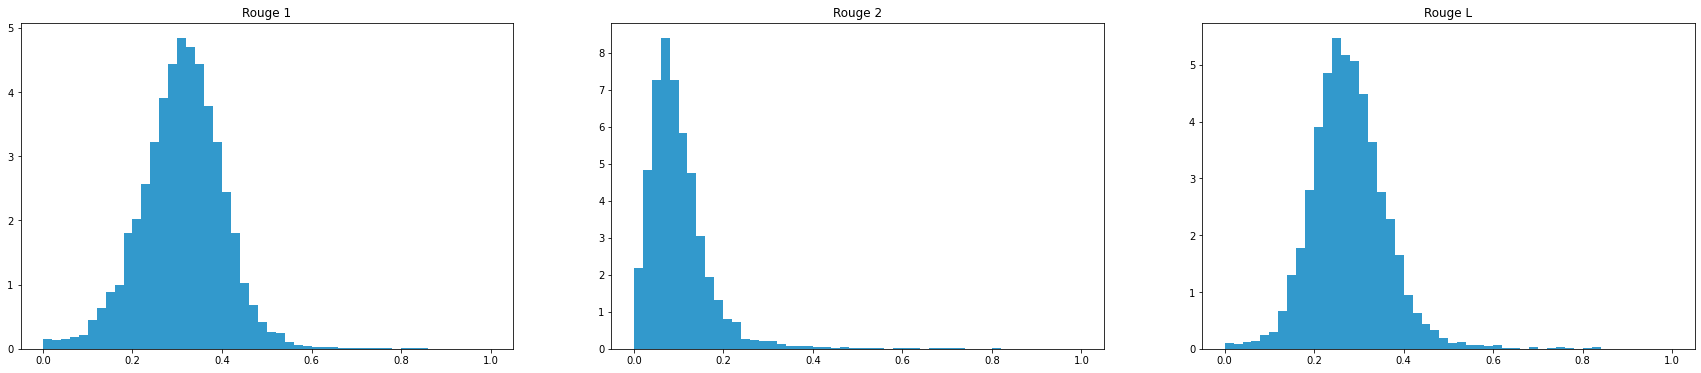

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(30,6))
ax1.set_title("Rouge 1")
ax2.set_title("Rouge 2")
ax3.set_title("Rouge L")
_ = ax1.hist(hist_1,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax2.hist(hist_2,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax3.hist(hist_l,bins=50,range=(0,1),density=True,color="#3299CC")

# PyTLDR

For the next 2 methods we will use the python library PyTLDR: https://pypi.org/project/PyTLDR/

Go to the code directory

In [ ]:
cd /content/drive/My Drive/tfm/PyTLDR

/content/drive/My Drive/tfm/PyTLDR


Install it, it should be already downloaded from the other dataset 1

In [ ]:
!python setup.py install

In case of recursion error use this:

In [ ]:
import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(2000000)
print(sys.getrecursionlimit())

1000
2000000


# Method 3: TextRank

### Hypper-parameter tunning

#### 0.2

In [ ]:
from pytldr.summarize import TextRankSummarizer
from pytldr.nlp import Tokenizer

tokenizer = Tokenizer('english')
summarizer = TextRankSummarizer(tokenizer)

# If you don't specify a tokenizer when intiializing a summarizer then the
# English tokenizer will be used by default
summarizer = TextRankSummarizer()  # English tokenizer used

# This object creates a summary using the summarize method:
# e.g. summarizer.summarize(text, length=5, weighting='frequency', norm=None)

# The length parameter specifies the length of the summary, either as a
# number of sentences, or a percentage of the original text

# The summarizer can take as input...
# 1. A string:
df = train_full
generated_summaries =[]
for i in range (0,8000):
    if (i %2000==0):print(i)
    sum = summarizer.summarize(df[i][1], length=0.2)
    if(len(sum)<1): sum = summarizer.summarize(df[i][1], length=0.3)
    if(len(sum)<1): sum = summarizer.summarize(df[i][1], length=0.4)
    if(len(sum)<1): sum = summarizer.summarize(df[i][1], length=0.5)
    if(len(sum)<1): sum = summarizer.summarize(df[i][1], length=0.6)
    if(len(sum)<1): sum = summarizer.summarize(df[i][1], length=0.7)
    if(len(sum)<1): sum = summarizer.summarize(df[i][1], length=0.8)
    if(len(sum)<1): sum = summarizer.summarize(df[i][1], length=0.9)
    #if(len(sum)< 4): print(i)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)

from rouge import Rouge

rouge_1= 0
rouge_2= 0
rouge_l= 0
rouge = Rouge()
for i in range(0,len(generated_summaries)):
    if (i %2000==0):print(i)
    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1];print(temp)
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0
4000
0
4000
rouge-1:  0.3113410913654835
rouge-2:  0.09456705698469747
rouge-l:  0.2611425952003773


#### 0.4

In [ ]:
from pytldr.summarize import TextRankSummarizer
from pytldr.nlp import Tokenizer

tokenizer = Tokenizer('english')
summarizer = TextRankSummarizer(tokenizer)

# If you don't specify a tokenizer when intiializing a summarizer then the
# English tokenizer will be used by default
summarizer = TextRankSummarizer()  # English tokenizer used

# This object creates a summary using the summarize method:
# e.g. summarizer.summarize(text, length=5, weighting='frequency', norm=None)

# The length parameter specifies the length of the summary, either as a
# number of sentences, or a percentage of the original text

# The summarizer can take as input...
# 1. A string:

df = train_full
generated_summaries =[]
for i in range (0,8000):
    if (i %2000==0):print(i)
    sum = summarizer.summarize(df[i][1], length=0.4)
    if(len(sum)<1): sum = summarizer.summarize(df[i][1], length=0.5)
    if(len(sum)<1): sum = summarizer.summarize(df[i][1], length=0.6)
    if(len(sum)<1): sum = summarizer.summarize(df[i][1], length=0.7)
    if(len(sum)<1): sum = summarizer.summarize(df[i][1], length=0.8)
    if(len(sum)<1): sum = summarizer.summarize(df[i][1], length=0.9)
    #if(len(sum)< 4): print(i)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)

from rouge import Rouge

rouge_1= 0
rouge_2= 0
rouge_l= 0
rouge = Rouge()
for i in range(0,len(generated_summaries)):
    if (i %2000==0):print(i)
    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1];print(temp)
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0
2000
4000
6000
0
2000
4000
6000
rouge-1:  0.2847133986423955
rouge-2:  0.10062838222647168
rouge-l:  0.2675928582088344


#### 0.6

In [ ]:
from pytldr.summarize import TextRankSummarizer
from pytldr.nlp import Tokenizer

tokenizer = Tokenizer('english')
summarizer = TextRankSummarizer(tokenizer)

# If you don't specify a tokenizer when intiializing a summarizer then the
# English tokenizer will be used by default
summarizer = TextRankSummarizer()  # English tokenizer used

# This object creates a summary using the summarize method:
# e.g. summarizer.summarize(text, length=5, weighting='frequency', norm=None)

# The length parameter specifies the length of the summary, either as a
# number of sentences, or a percentage of the original text

# The summarizer can take as input...
# 1. A string:

df = train_full
generated_summaries =[]
for i in range (0,8000):
    if (i %2000==0):print(i)
    sum = summarizer.summarize(df[i][1], length=0.6)
    if(len(sum)<1): sum = summarizer.summarize(df[i][1], length=0.7)
    if(len(sum)<1): sum = summarizer.summarize(df[i][1], length=0.8)
    if(len(sum)<1): sum = summarizer.summarize(df[i][1], length=0.9)
    #if(len(sum)< 4): print(i)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)

from rouge import Rouge

rouge_1= 0
rouge_2= 0
rouge_l= 0
rouge = Rouge()
for i in range(0,len(generated_summaries)):
    if (i %2000==0):print(i)
    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1];print(temp)
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0
2000
4000
6000
0
2000
4000
6000
rouge-1:  0.2587117682574853
rouge-2:  0.10109672968289388
rouge-l:  0.2639437851904851


#### 0.8

In [ ]:
from pytldr.summarize import TextRankSummarizer
from pytldr.nlp import Tokenizer

tokenizer = Tokenizer('english')
summarizer = TextRankSummarizer(tokenizer)

# If you don't specify a tokenizer when intiializing a summarizer then the
# English tokenizer will be used by default
summarizer = TextRankSummarizer()  # English tokenizer used

# This object creates a summary using the summarize method:
# e.g. summarizer.summarize(text, length=5, weighting='frequency', norm=None)

# The length parameter specifies the length of the summary, either as a
# number of sentences, or a percentage of the original text

# The summarizer can take as input...
# 1. A string:

df = train_full
generated_summaries =[]
for i in range (0,8000):
    if (i %2000==0):print(i)
    sum = summarizer.summarize(df[i][1], length=0.8)
    if(len(sum)<1): sum = summarizer.summarize(df[i][1], length=0.9)
    #if(len(sum)< 4): print(i)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)

from rouge import Rouge

rouge_1= 0
rouge_2= 0
rouge_l= 0
rouge = Rouge()
for i in range(0,len(generated_summaries)):
    if (i %2000==0):print(i)
    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1];print(temp)
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0
2000
4000
6000
0
2000
4000
6000
rouge-1:  0.23925127565117355
rouge-2:  0.10099737485361565
rouge-l:  0.259134796192483


#### 0.1

In [ ]:
from pytldr.summarize import TextRankSummarizer
from pytldr.nlp import Tokenizer

tokenizer = Tokenizer('english')
summarizer = TextRankSummarizer(tokenizer)

# If you don't specify a tokenizer when intiializing a summarizer then the
# English tokenizer will be used by default
summarizer = TextRankSummarizer()  # English tokenizer used

# This object creates a summary using the summarize method:
# e.g. summarizer.summarize(text, length=5, weighting='frequency', norm=None)

# The length parameter specifies the length of the summary, either as a
# number of sentences, or a percentage of the original text

# The summarizer can take as input...
# 1. A string:

df = train_full
generated_summaries =[]
for i in range (0,8000):
    if (i %4000==0):print(i)
    sum = summarizer.summarize(df[i][1], length=0.1)
    if(len(sum)<1): sum = summarizer.summarize(df[i][1], length=0.2)
    if(len(sum)<1): sum = summarizer.summarize(df[i][1], length=0.3)
    if(len(sum)<1): sum = summarizer.summarize(df[i][1], length=0.4)
    if(len(sum)<1): sum = summarizer.summarize(df[i][1], length=0.5)
    if(len(sum)<1): sum = summarizer.summarize(df[i][1], length=0.6)
    if(len(sum)<1): sum = summarizer.summarize(df[i][1], length=0.7)
    if(len(sum)<1): sum = summarizer.summarize(df[i][1], length=0.8)
    if(len(sum)<1): sum = summarizer.summarize(df[i][1], length=0.9)
    #if(len(sum)< 4): print(i)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)

from rouge import Rouge

rouge_1= 0
rouge_2= 0
rouge_l= 0
rouge = Rouge()
for i in range(0,len(generated_summaries)):
    if (i %4000==0):print(i)
    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1];print(temp)
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.1
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0
4000
0
4000
rouge-1:  0.302146313169703
rouge-2:  0.08194457396675783
rouge-l:  0.23905586993922426


#### 2

In [ ]:
from pytldr.summarize import TextRankSummarizer
from pytldr.nlp import Tokenizer

tokenizer = Tokenizer('english')
summarizer = TextRankSummarizer(tokenizer)

# If you don't specify a tokenizer when intiializing a summarizer then the
# English tokenizer will be used by default
summarizer = TextRankSummarizer()  # English tokenizer used

# This object creates a summary using the summarize method:
# e.g. summarizer.summarize(text, length=5, weighting='frequency', norm=None)

# The length parameter specifies the length of the summary, either as a
# number of sentences, or a percentage of the original text

# The summarizer can take as input...
# 1. A string:

df = train_full
generated_summaries =[]
for i in range (0,8000):
    if (i %4000==0):print(i)
    sum = summarizer.summarize(df[i][1], length=2)

    #if(len(sum)< 4): print(i)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)

from rouge import Rouge

rouge_1= 0
rouge_2= 0
rouge_l= 0
rouge = Rouge()
for i in range(0,len(generated_summaries)):
    if (i %4000==0):print(i)
    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1];print(temp)
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.1
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0
4000
0
4000
rouge-1:  0.25512020811348196
rouge-2:  0.06560675140577404
rouge-l:  0.20644397203452455


#### 3

In [ ]:
from pytldr.summarize import TextRankSummarizer
from pytldr.nlp import Tokenizer

tokenizer = Tokenizer('english')
summarizer = TextRankSummarizer(tokenizer)

# If you don't specify a tokenizer when intiializing a summarizer then the
# English tokenizer will be used by default
summarizer = TextRankSummarizer()  # English tokenizer used

# This object creates a summary using the summarize method:
# e.g. summarizer.summarize(text, length=5, weighting='frequency', norm=None)

# The length parameter specifies the length of the summary, either as a
# number of sentences, or a percentage of the original text

# The summarizer can take as input...
# 1. A string:

df = train_full
generated_summaries =[]
for i in range (0,8000):
    if (i %4000==0):print(i)
    sum = summarizer.summarize(df[i][1], length=3)

    #if(len(sum)< 4): print(i)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)

from rouge import Rouge

rouge_1= 0
rouge_2= 0
rouge_l= 0
rouge = Rouge()
for i in range(0,len(generated_summaries)):
    if (i %4000==0):print(i)
    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1];print(temp)
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.1
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0
4000
0
4000
rouge-1:  0.2976595799492429
rouge-2:  0.07823484156726317
rouge-l:  0.2318610981634792


#### 4

In [ ]:
from pytldr.summarize import TextRankSummarizer
from pytldr.nlp import Tokenizer

tokenizer = Tokenizer('english')
summarizer = TextRankSummarizer(tokenizer)

# If you don't specify a tokenizer when intiializing a summarizer then the
# English tokenizer will be used by default
summarizer = TextRankSummarizer()  # English tokenizer used

# This object creates a summary using the summarize method:
# e.g. summarizer.summarize(text, length=5, weighting='frequency', norm=None)

# The length parameter specifies the length of the summary, either as a
# number of sentences, or a percentage of the original text

# The summarizer can take as input...
# 1. A string:

df = train_full
generated_summaries =[]
for i in range (0,8000):
    if (i %4000==0):print(i)
    sum = summarizer.summarize(df[i][1], length=4)

    #if(len(sum)< 4): print(i)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)

from rouge import Rouge

rouge_1= 0
rouge_2= 0
rouge_l= 0
rouge = Rouge()
for i in range(0,len(generated_summaries)):
    if (i %4000==0):print(i)
    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1];print(temp)
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.1
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0
4000
0
4000
rouge-1:  0.32125048276819845
rouge-2:  0.08629024930478203
rouge-l:  0.24683164381511694


#### 0.3

In [ ]:
from pytldr.summarize import TextRankSummarizer
from pytldr.nlp import Tokenizer

tokenizer = Tokenizer('english')
summarizer = TextRankSummarizer(tokenizer)

# If you don't specify a tokenizer when intiializing a summarizer then the
# English tokenizer will be used by default
summarizer = TextRankSummarizer()  # English tokenizer used

# This object creates a summary using the summarize method:
# e.g. summarizer.summarize(text, length=5, weighting='frequency', norm=None)

# The length parameter specifies the length of the summary, either as a
# number of sentences, or a percentage of the original text

# The summarizer can take as input...
# 1. A string:

df = train_full
generated_summaries =[]
for i in range (0,8000):
    if (i %4000==0):print(i)
    sum = summarizer.summarize(df[i][1], length=0.3)
    if(len(sum)<1): sum = summarizer.summarize(df[i][1], length=0.3)
    if(len(sum)<1): sum = summarizer.summarize(df[i][1], length=0.4)
    if(len(sum)<1): sum = summarizer.summarize(df[i][1], length=0.5)
    if(len(sum)<1): sum = summarizer.summarize(df[i][1], length=0.6)
    if(len(sum)<1): sum = summarizer.summarize(df[i][1], length=0.7)
    if(len(sum)<1): sum = summarizer.summarize(df[i][1], length=0.8)
    #if(len(sum)< 4): print(i)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)

from rouge import Rouge

rouge_1= 0
rouge_2= 0
rouge_l= 0
rouge = Rouge()
for i in range(0,len(generated_summaries)):
    if (i %4000==0):print(i)
    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1];print(temp)
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.1
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0
4000
0
4000
rouge-1:  0.29932281005042904
rouge-2:  0.0989169760634239
rouge-l:  0.26695148416188486


#### 5

In [ ]:
from pytldr.summarize import TextRankSummarizer
from pytldr.nlp import Tokenizer

tokenizer = Tokenizer('english')
summarizer = TextRankSummarizer(tokenizer)

# If you don't specify a tokenizer when intiializing a summarizer then the
# English tokenizer will be used by default
summarizer = TextRankSummarizer()  # English tokenizer used

# This object creates a summary using the summarize method:
# e.g. summarizer.summarize(text, length=5, weighting='frequency', norm=None)

# The length parameter specifies the length of the summary, either as a
# number of sentences, or a percentage of the original text

# The summarizer can take as input...
# 1. A string:

df = train_full
generated_summaries =[]
for i in range (0,8000):
    if (i %4000==0):print(i)
    sum = summarizer.summarize(df[i][1], length=5)

    #if(len(sum)< 4): print(i)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)

from rouge import Rouge

rouge_1= 0
rouge_2= 0
rouge_l= 0
rouge = Rouge()
for i in range(0,len(generated_summaries)):
    if (i %4000==0):print(i)
    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1];print(temp)
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.1
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0
4000
0
4000
rouge-1:  0.3344676239518084
rouge-2:  0.09200314124978454
rouge-l:  0.25699853044257015


#### 6

In [ ]:
from pytldr.summarize import TextRankSummarizer
from pytldr.nlp import Tokenizer

tokenizer = Tokenizer('english')
summarizer = TextRankSummarizer(tokenizer)

# If you don't specify a tokenizer when intiializing a summarizer then the
# English tokenizer will be used by default
summarizer = TextRankSummarizer()  # English tokenizer used

# This object creates a summary using the summarize method:
# e.g. summarizer.summarize(text, length=5, weighting='frequency', norm=None)

# The length parameter specifies the length of the summary, either as a
# number of sentences, or a percentage of the original text

# The summarizer can take as input...
# 1. A string:

df = train_full
generated_summaries =[]
for i in range (0,8000):
    if (i %4000==0):print(i)
    sum = summarizer.summarize(df[i][1], length=6)

    #if(len(sum)< 4): print(i)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)

from rouge import Rouge

rouge_1= 0
rouge_2= 0
rouge_l= 0
rouge = Rouge()
for i in range(0,len(generated_summaries)):
    if (i %4000==0):print(i)
    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1];print(temp)
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.1
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0
4000
0
4000
rouge-1:  0.34075974671236703
rouge-2:  0.09607622502900083
rouge-l:  0.2639912591486216


#### 7

In [ ]:
from pytldr.summarize import TextRankSummarizer
from pytldr.nlp import Tokenizer

tokenizer = Tokenizer('english')
summarizer = TextRankSummarizer(tokenizer)

# If you don't specify a tokenizer when intiializing a summarizer then the
# English tokenizer will be used by default
summarizer = TextRankSummarizer()  # English tokenizer used

# This object creates a summary using the summarize method:
# e.g. summarizer.summarize(text, length=5, weighting='frequency', norm=None)

# The length parameter specifies the length of the summary, either as a
# number of sentences, or a percentage of the original text

# The summarizer can take as input...
# 1. A string:

df = train_full
generated_summaries =[]
for i in range (0,8000):
    if (i %4000==0):print(i)
    sum = summarizer.summarize(df[i][1], length=7)

    #if(len(sum)< 4): print(i)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)

from rouge import Rouge

rouge_1= 0
rouge_2= 0
rouge_l= 0
rouge = Rouge()
for i in range(0,len(generated_summaries)):
    if (i %4000==0):print(i)
    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1];print(temp)
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.1
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0
4000
0
4000
rouge-1:  0.3426190339562135
rouge-2:  0.09906632743334315
rouge-l:  0.2687309700827728


#### 8

In [ ]:
from pytldr.summarize import TextRankSummarizer
from pytldr.nlp import Tokenizer

tokenizer = Tokenizer('english')
summarizer = TextRankSummarizer(tokenizer)

# If you don't specify a tokenizer when intiializing a summarizer then the
# English tokenizer will be used by default
summarizer = TextRankSummarizer()  # English tokenizer used

# This object creates a summary using the summarize method:
# e.g. summarizer.summarize(text, length=5, weighting='frequency', norm=None)

# The length parameter specifies the length of the summary, either as a
# number of sentences, or a percentage of the original text

# The summarizer can take as input...
# 1. A string:

df = train_full
generated_summaries =[]
for i in range (0,8000):
    if (i %4000==0):print(i)
    sum = summarizer.summarize(df[i][1], length=8)

    #if(len(sum)< 4): print(i)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)

from rouge import Rouge

rouge_1= 0
rouge_2= 0
rouge_l= 0
rouge = Rouge()
for i in range(0,len(generated_summaries)):
    if (i %4000==0):print(i)
    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1];print(temp)
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.1
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0
4000
0
4000
rouge-1:  0.3418181518340622
rouge-2:  0.10141027217817451
rouge-l:  0.27225228336869206


#### 9

In [ ]:
from pytldr.summarize import TextRankSummarizer
from pytldr.nlp import Tokenizer

tokenizer = Tokenizer('english')
summarizer = TextRankSummarizer(tokenizer)

# If you don't specify a tokenizer when intiializing a summarizer then the
# English tokenizer will be used by default
summarizer = TextRankSummarizer()  # English tokenizer used

# This object creates a summary using the summarize method:
# e.g. summarizer.summarize(text, length=5, weighting='frequency', norm=None)

# The length parameter specifies the length of the summary, either as a
# number of sentences, or a percentage of the original text

# The summarizer can take as input...
# 1. A string:

df = train_full
generated_summaries =[]
for i in range (0,8000):
    if (i %4000==0):print(i)
    sum = summarizer.summarize(df[i][1], length=9)

    #if(len(sum)< 4): print(i)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)

from rouge import Rouge

rouge_1= 0
rouge_2= 0
rouge_l= 0
rouge = Rouge()
for i in range(0,len(generated_summaries)):
    if (i %4000==0):print(i)
    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1];print(temp)
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.1
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0
4000
0
4000
rouge-1:  0.3392827277916318
rouge-2:  0.10291700174922251
rouge-l:  0.2745382897919626


#### 10

In [ ]:
from pytldr.summarize import TextRankSummarizer
from pytldr.nlp import Tokenizer

tokenizer = Tokenizer('english')
summarizer = TextRankSummarizer(tokenizer)

# If you don't specify a tokenizer when intiializing a summarizer then the
# English tokenizer will be used by default
summarizer = TextRankSummarizer()  # English tokenizer used

# This object creates a summary using the summarize method:
# e.g. summarizer.summarize(text, length=5, weighting='frequency', norm=None)

# The length parameter specifies the length of the summary, either as a
# number of sentences, or a percentage of the original text

# The summarizer can take as input...
# 1. A string:

df = train_full
generated_summaries =[]
for i in range (0,8000):
    if (i %4000==0):print(i)
    sum = summarizer.summarize(df[i][1], length=10)

    #if(len(sum)< 4): print(i)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)

from rouge import Rouge

rouge_1= 0
rouge_2= 0
rouge_l= 0
rouge = Rouge()
for i in range(0,len(generated_summaries)):
    if (i %4000==0):print(i)
    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1];print(temp)
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.1
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0
4000
0
4000
rouge-1:  0.33578213587255107
rouge-2:  0.10404176059546501
rouge-l:  0.27616957038097734


#### 11

In [ ]:
from pytldr.summarize import TextRankSummarizer
from pytldr.nlp import Tokenizer

tokenizer = Tokenizer('english')
summarizer = TextRankSummarizer(tokenizer)

# If you don't specify a tokenizer when intiializing a summarizer then the
# English tokenizer will be used by default
summarizer = TextRankSummarizer()  # English tokenizer used

# This object creates a summary using the summarize method:
# e.g. summarizer.summarize(text, length=5, weighting='frequency', norm=None)

# The length parameter specifies the length of the summary, either as a
# number of sentences, or a percentage of the original text

# The summarizer can take as input...
# 1. A string:

df = train_full
generated_summaries =[]
for i in range (0,8000):
    if (i %4000==0):print(i)
    sum = summarizer.summarize(df[i][1], length=11)

    #if(len(sum)< 4): print(i)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)

from rouge import Rouge

rouge_1= 0
rouge_2= 0
rouge_l= 0
rouge = Rouge()
for i in range(0,len(generated_summaries)):
    if (i %4000==0):print(i)
    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1];print(temp)
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.1
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0
4000
0
4000
rouge-1:  0.33173727758487676
rouge-2:  0.10503741849108968
rouge-l:  0.2775191673467841


#### 12

In [ ]:
from pytldr.summarize import TextRankSummarizer
from pytldr.nlp import Tokenizer

tokenizer = Tokenizer('english')
summarizer = TextRankSummarizer(tokenizer)

# If you don't specify a tokenizer when intiializing a summarizer then the
# English tokenizer will be used by default
summarizer = TextRankSummarizer()  # English tokenizer used

# This object creates a summary using the summarize method:
# e.g. summarizer.summarize(text, length=5, weighting='frequency', norm=None)

# The length parameter specifies the length of the summary, either as a
# number of sentences, or a percentage of the original text

# The summarizer can take as input...
# 1. A string:

df = train_full
generated_summaries =[]
for i in range (0,8000):
    if (i %4000==0):print(i)
    sum = summarizer.summarize(df[i][1], length=12)

    #if(len(sum)< 4): print(i)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)

from rouge import Rouge

rouge_1= 0
rouge_2= 0
rouge_l= 0
rouge = Rouge()
for i in range(0,len(generated_summaries)):
    if (i %4000==0):print(i)
    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1];print(temp)
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.1
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0
4000
0
4000
rouge-1:  0.327368345581605
rouge-2:  0.10586854929605446
rouge-l:  0.27841135932363814


#### 13

In [ ]:
from pytldr.summarize import TextRankSummarizer
from pytldr.nlp import Tokenizer

tokenizer = Tokenizer('english')
summarizer = TextRankSummarizer(tokenizer)

# If you don't specify a tokenizer when intiializing a summarizer then the
# English tokenizer will be used by default
summarizer = TextRankSummarizer()  # English tokenizer used

# This object creates a summary using the summarize method:
# e.g. summarizer.summarize(text, length=5, weighting='frequency', norm=None)

# The length parameter specifies the length of the summary, either as a
# number of sentences, or a percentage of the original text

# The summarizer can take as input...
# 1. A string:

df = train_full
generated_summaries =[]
for i in range (0,8000):
    if (i %4000==0):print(i)
    sum = summarizer.summarize(df[i][1], length=13)

    #if(len(sum)< 4): print(i)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)

from rouge import Rouge

rouge_1= 0
rouge_2= 0
rouge_l= 0
rouge = Rouge()
for i in range(0,len(generated_summaries)):
    if (i %4000==0):print(i)
    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1];print(temp)
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.1
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0
4000
0
4000
rouge-1:  0.32294037084387306
rouge-2:  0.1064509786722175
rouge-l:  0.278943567605689


### test text rank

In [ ]:
from pytldr.summarize import TextRankSummarizer
from pytldr.nlp import Tokenizer

tokenizer = Tokenizer('english')
summarizer = TextRankSummarizer(tokenizer)

# If you don't specify a tokenizer when intiializing a summarizer then the
# English tokenizer will be used by default
summarizer = TextRankSummarizer()  # English tokenizer used

# This object creates a summary using the summarize method:
# e.g. summarizer.summarize(text, length=5, weighting='frequency', norm=None)

# The length parameter specifies the length of the summary, either as a
# number of sentences, or a percentage of the original text

# The summarizer can take as input...
# 1. A string:
counter = 0
df = test
generated_summaries =[]
for i in range (0,len(test)):
    if (i %2000==0):print(i)
    sum = summarizer.summarize(df[i][1], length=7
                               )

    #if(len(sum)< 4): print(i)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
        counter+=1
    generated_summaries.append(sum2)

from rouge import Rouge

rouge_1= 0
rouge_2= 0
rouge_l= 0
rouge = Rouge()
hist_1 = []
hist_2 = []
hist_l = []

for i in range(0,len(generated_summaries)):
    if (i %2000==0):print(i)
    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1]; print(i)
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])

    hist_1.append(float(scores1[0]['rouge-1']['f']))
    hist_2.append(float(scores1[0]['rouge-2']['f']))
    hist_l.append(float(scores1[0]['rouge-l']['f']))


        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) 
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def get_conf_int(hist,alpha):
    # confidence intervals
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(hist, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(hist, p))
    return lower,upper


alpha = 0.9
lower1,upper1 = get_conf_int(hist_1,alpha)
lower2,upper2 = get_conf_int(hist_2,alpha)
lower3,upper3 = get_conf_int(hist_l,alpha)

print('Rouge-1:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_1,alpha*100, lower1, upper1))
print('Rouge-2:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_2,alpha*100, lower2, upper2))
print('Rouge-l:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_l,alpha*100, lower3, upper3))

Rouge-1:
 	 mean: 0.3417 
 	 Confidence interval: 90 %  [0.209 , 0.465]
Rouge-2:
 	 mean: 0.0985 
 	 Confidence interval: 90 %  [0.023 , 0.218]
Rouge-l:
 	 mean: 0.2695 
 	 Confidence interval: 90 %  [0.157 , 0.401]


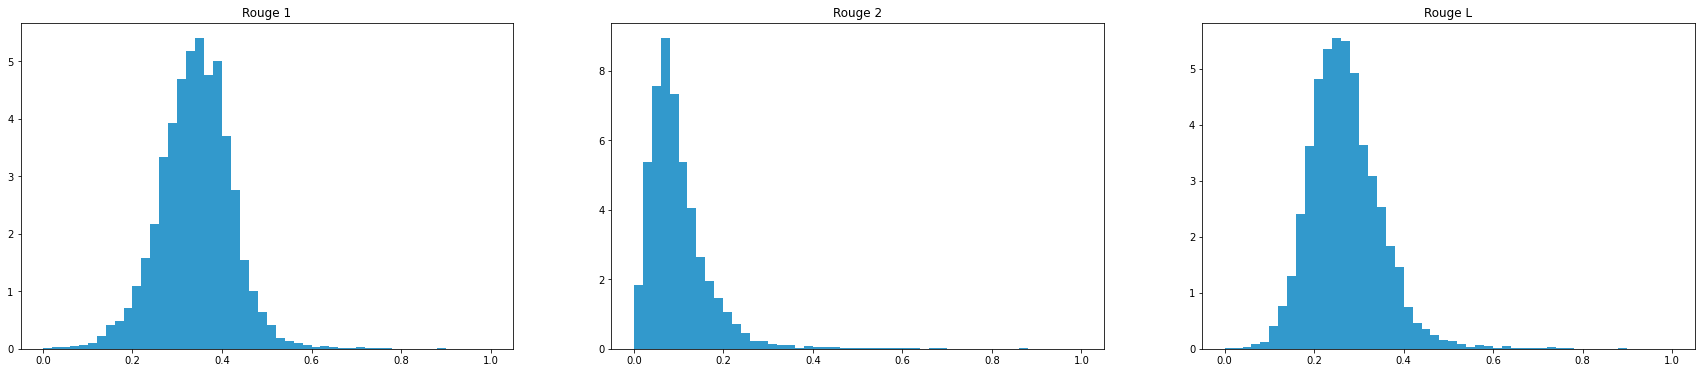

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(30,6))
ax1.set_title("Rouge 1")
ax2.set_title("Rouge 2")
ax3.set_title("Rouge L")
_ = ax1.hist(hist_1,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax2.hist(hist_2,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax3.hist(hist_l,bins=50,range=(0,1),density=True,color="#3299CC")

# Method 4: LSA

## hypper parameter tunning

### topic 8 length 6

In [ ]:
from pytldr.summarize import LsaSummarizer, LsaOzsoy, LsaSteinberger

#summarizer = LsaOzsoy()
#summarizer = LsaSteinberger()
summarizer = LsaSummarizer()  # This is identical to the LsaOzsoy object

# topics specifies the number of topics to cluster the article into.
# topic_sigma_threshold removes all topics with a singular value less than a given
# percentage of the largest singular value.

df = train_full
generated_summaries =[]
for i in range (0,8000):
    #print(i)
    if (i %20000==0):print(i)
    sum = summarizer.summarize(df[i][1], topics=8, length=6, binary_matrix=True)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)


from rouge import Rouge
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
final_scores=[]
for i in range(0,len(generated_summaries)):
    if (i %20000==0):print(i)

    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1]
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0


/content/drive/My Drive/tfm/PyTLDR/pytldr/summarize/lsa.py:36: Warning: The parameter "topics" must be <= rank(sentence_matrix) - 1 to avoid rank deficiency in the SVD computation. The number of topics has been adjusted to equal rank(sentence_matrix) - 1 but this could result in a poor summary.
  Warning


0
rouge-1:  0.33305912552165917
rouge-2:  0.09132246149747725
rouge-l:  0.2538465533568683


### topic 8 length 8

In [ ]:
from pytldr.summarize import LsaSummarizer, LsaOzsoy, LsaSteinberger

#summarizer = LsaOzsoy()
#summarizer = LsaSteinberger()
summarizer = LsaSummarizer()  # This is identical to the LsaOzsoy object

# topics specifies the number of topics to cluster the article into.
# topic_sigma_threshold removes all topics with a singular value less than a given
# percentage of the largest singular value.

df = train_full
generated_summaries =[]
for i in range (0,8000):
    #print(i)
    if (i %20000==0):print(i)
    sum = summarizer.summarize(df[i][1], topics=8, length=8, binary_matrix=True)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)


from rouge import Rouge
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
final_scores=[]
for i in range(0,len(generated_summaries)):
    if (i %20000==0):print(i)

    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1]
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0


/content/drive/My Drive/tfm/PyTLDR/pytldr/summarize/lsa.py:36: Warning: The parameter "topics" must be <= rank(sentence_matrix) - 1 to avoid rank deficiency in the SVD computation. The number of topics has been adjusted to equal rank(sentence_matrix) - 1 but this could result in a poor summary.
  Warning


0
rouge-1:  0.3368682387350147
rouge-2:  0.09725654016912527
rouge-l:  0.26404954991610907


### topic 16 length 8

In [ ]:
from pytldr.summarize import LsaSummarizer, LsaOzsoy, LsaSteinberger

#summarizer = LsaOzsoy()
#summarizer = LsaSteinberger()
summarizer = LsaSummarizer()  # This is identical to the LsaOzsoy object

# topics specifies the number of topics to cluster the article into.
# topic_sigma_threshold removes all topics with a singular value less than a given
# percentage of the largest singular value.

df = train_full
generated_summaries =[]
for i in range (0,8000):
    #print(i)
    if (i %20000==0):print(i)
    sum = summarizer.summarize(df[i][1], topics=16, length=8, binary_matrix=True)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)


from rouge import Rouge
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
final_scores=[]
for i in range(0,len(generated_summaries)):
    if (i %20000==0):print(i)

    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1]
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0


/content/drive/My Drive/tfm/PyTLDR/pytldr/summarize/lsa.py:36: Warning: The parameter "topics" must be <= rank(sentence_matrix) - 1 to avoid rank deficiency in the SVD computation. The number of topics has been adjusted to equal rank(sentence_matrix) - 1 but this could result in a poor summary.
  Warning


0
rouge-1:  0.33611092931441233
rouge-2:  0.09591016773434509
rouge-l:  0.2601027769673478


### topic 16 length 10

In [ ]:
from pytldr.summarize import LsaSummarizer, LsaOzsoy, LsaSteinberger

#summarizer = LsaOzsoy()
#summarizer = LsaSteinberger()
summarizer = LsaSummarizer()  # This is identical to the LsaOzsoy object

# topics specifies the number of topics to cluster the article into.
# topic_sigma_threshold removes all topics with a singular value less than a given
# percentage of the largest singular value.

df = train_full
generated_summaries =[]
for i in range (0,8000):
    #print(i)
    if (i %20000==0):print(i)
    sum = summarizer.summarize(df[i][1], topics=16, length=10, binary_matrix=True)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)


from rouge import Rouge
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
final_scores=[]
for i in range(0,len(generated_summaries)):
    if (i %20000==0):print(i)

    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1]
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0


/content/drive/My Drive/tfm/PyTLDR/pytldr/summarize/lsa.py:36: Warning: The parameter "topics" must be <= rank(sentence_matrix) - 1 to avoid rank deficiency in the SVD computation. The number of topics has been adjusted to equal rank(sentence_matrix) - 1 but this could result in a poor summary.
  Warning


0
rouge-1:  0.33223915659192466
rouge-2:  0.09945680536197633
rouge-l:  0.26542826577437895


### topic 16 length 12

In [ ]:
from pytldr.summarize import LsaSummarizer, LsaOzsoy, LsaSteinberger

#summarizer = LsaOzsoy()
#summarizer = LsaSteinberger()
summarizer = LsaSummarizer()  # This is identical to the LsaOzsoy object

# topics specifies the number of topics to cluster the article into.
# topic_sigma_threshold removes all topics with a singular value less than a given
# percentage of the largest singular value.

df = train_full
generated_summaries =[]
for i in range (0,8000):
    #print(i)
    if (i %20000==0):print(i)
    sum = summarizer.summarize(df[i][1], topics=16, length=12, binary_matrix=True)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)


from rouge import Rouge
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
final_scores=[]
for i in range(0,len(generated_summaries)):
    if (i %20000==0):print(i)

    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1]
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0


/content/drive/My Drive/tfm/PyTLDR/pytldr/summarize/lsa.py:36: Warning: The parameter "topics" must be <= rank(sentence_matrix) - 1 to avoid rank deficiency in the SVD computation. The number of topics has been adjusted to equal rank(sentence_matrix) - 1 but this could result in a poor summary.
  Warning


0
rouge-1:  0.3251439183829019
rouge-2:  0.10294397376372996
rouge-l:  0.2693056081587013


### topic 16 length 14

In [ ]:
from pytldr.summarize import LsaSummarizer, LsaOzsoy, LsaSteinberger

#summarizer = LsaOzsoy()
#summarizer = LsaSteinberger()
summarizer = LsaSummarizer()  # This is identical to the LsaOzsoy object

# topics specifies the number of topics to cluster the article into.
# topic_sigma_threshold removes all topics with a singular value less than a given
# percentage of the largest singular value.

df = train_full
generated_summaries =[]
for i in range (0,8000):
    #print(i)
    if (i %20000==0):print(i)
    sum = summarizer.summarize(df[i][1], topics=16, length=14, binary_matrix=True)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)


from rouge import Rouge
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
final_scores=[]
for i in range(0,len(generated_summaries)):
    if (i %20000==0):print(i)

    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1]
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0


/content/drive/My Drive/tfm/PyTLDR/pytldr/summarize/lsa.py:36: Warning: The parameter "topics" must be <= rank(sentence_matrix) - 1 to avoid rank deficiency in the SVD computation. The number of topics has been adjusted to equal rank(sentence_matrix) - 1 but this could result in a poor summary.
  Warning


0
rouge-1:  0.3168009916889899
rouge-2:  0.10416617781440941
rouge-l:  0.27075309230975747


### topic 8 length 4

In [ ]:
from pytldr.summarize import LsaSummarizer, LsaOzsoy, LsaSteinberger

#summarizer = LsaOzsoy()
#summarizer = LsaSteinberger()
summarizer = LsaSummarizer()  # This is identical to the LsaOzsoy object

# topics specifies the number of topics to cluster the article into.
# topic_sigma_threshold removes all topics with a singular value less than a given
# percentage of the largest singular value.

df = train_full
generated_summaries =[]
for i in range (0,8000):
    #print(i)
    if (i %20000==0):print(i)
    sum = summarizer.summarize(df[i][1], topics=8, length=4, binary_matrix=True)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)


from rouge import Rouge
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
final_scores=[]
for i in range(0,len(generated_summaries)):
    if (i %20000==0):print(i)

    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1]
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0


/content/drive/My Drive/tfm/PyTLDR/pytldr/summarize/lsa.py:36: Warning: The parameter "topics" must be <= rank(sentence_matrix) - 1 to avoid rank deficiency in the SVD computation. The number of topics has been adjusted to equal rank(sentence_matrix) - 1 but this could result in a poor summary.
  Warning


0
rouge-1:  0.30790890999762727
rouge-2:  0.07869604718614538
rouge-l:  0.23300022265256704


### topic 4 length 8

In [ ]:
from pytldr.summarize import LsaSummarizer, LsaOzsoy, LsaSteinberger

#summarizer = LsaOzsoy()
#summarizer = LsaSteinberger()
summarizer = LsaSummarizer()  # This is identical to the LsaOzsoy object

# topics specifies the number of topics to cluster the article into.
# topic_sigma_threshold removes all topics with a singular value less than a given
# percentage of the largest singular value.

df = train_full
generated_summaries =[]
for i in range (0,8000):
    #print(i)
    if (i %20000==0):print(i)
    sum = summarizer.summarize(df[i][1], topics=4, length=8, binary_matrix=True)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)


from rouge import Rouge
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
final_scores=[]
for i in range(0,len(generated_summaries)):
    if (i %20000==0):print(i)

    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1]
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0
0
rouge-1:  0.3356852143837471
rouge-2:  0.09653790157097661
rouge-l:  0.26453695590435


### topic 2 length 8

In [ ]:
from pytldr.summarize import LsaSummarizer, LsaOzsoy, LsaSteinberger

#summarizer = LsaOzsoy()
#summarizer = LsaSteinberger()
summarizer = LsaSummarizer()  # This is identical to the LsaOzsoy object

# topics specifies the number of topics to cluster the article into.
# topic_sigma_threshold removes all topics with a singular value less than a given
# percentage of the largest singular value.

df = train_full
generated_summaries =[]
for i in range (0,8000):
    #print(i)
    if (i %20000==0):print(i)
    sum = summarizer.summarize(df[i][1], topics=2, length=8, binary_matrix=True)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)


from rouge import Rouge
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
final_scores=[]
for i in range(0,len(generated_summaries)):
    if (i %20000==0):print(i)

    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1]
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0
0
rouge-1:  0.3339403312511562
rouge-2:  0.09398300948600025
rouge-l:  0.2629350283878003


### topic 8 length 10

In [ ]:
from pytldr.summarize import LsaSummarizer, LsaOzsoy, LsaSteinberger

#summarizer = LsaOzsoy()
#summarizer = LsaSteinberger()
summarizer = LsaSummarizer()  # This is identical to the LsaOzsoy object

# topics specifies the number of topics to cluster the article into.
# topic_sigma_threshold removes all topics with a singular value less than a given
# percentage of the largest singular value.

df = train_full
generated_summaries =[]
for i in range (0,8000):
    #print(i)
    if (i %20000==0):print(i)
    sum = summarizer.summarize(df[i][1], topics=8, length=10, binary_matrix=True)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)


from rouge import Rouge
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
final_scores=[]
for i in range(0,len(generated_summaries)):
    if (i %20000==0):print(i)

    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1]
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0
0
rouge-1:  0.3330625899061165
rouge-2:  0.10165636182125377
rouge-l:  0.2699061112763444


### topic 8 length 12

In [ ]:
from pytldr.summarize import LsaSummarizer, LsaOzsoy, LsaSteinberger

#summarizer = LsaOzsoy()
#summarizer = LsaSteinberger()
summarizer = LsaSummarizer()  # This is identical to the LsaOzsoy object

# topics specifies the number of topics to cluster the article into.
# topic_sigma_threshold removes all topics with a singular value less than a given
# percentage of the largest singular value.

df = train_full
generated_summaries =[]
for i in range (0,8000):
    #print(i)
    if (i %20000==0):print(i)
    sum = summarizer.summarize(df[i][1], topics=8, length=12, binary_matrix=True)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)


from rouge import Rouge
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
final_scores=[]
for i in range(0,len(generated_summaries)):
    if (i %20000==0):print(i)

    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1]
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0
0
rouge-1:  0.3257455508932856
rouge-2:  0.10346751439635642
rouge-l:  0.27280575884622427


## Test 

In [ ]:
from pytldr.summarize import LsaSummarizer, LsaOzsoy, LsaSteinberger

#summarizer = LsaOzsoy()
#summarizer = LsaSteinberger()
summarizer = LsaSummarizer()  # This is identical to the LsaOzsoy object

# topics specifies the number of topics to cluster the article into.
# topic_sigma_threshold removes all topics with a singular value less than a given
# percentage of the largest singular value.

df = test
generated_summaries =[]
for i in range (0,len(df)):
    #print(i)
    if (i %20000==0):print(i)
    sum = summarizer.summarize(df[i][1], topics=8, length=8, binary_matrix=True)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)


from rouge import Rouge
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
final_scores=[]
hist_1 = []
hist_2 =[]
hist_l =[]


for i in range(0,len(generated_summaries)):
    if (i %20000==0):print(i)

    temp = generated_summaries[i]
    if (len(temp)==0):temp = df[i][1]
    scores1 = rouge.get_scores(temp,df[i][0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
    
    hist_1.append(float(scores1[0]['rouge-1']['f']))
    hist_2.append(float(scores1[0]['rouge-2']['f']))
    hist_l.append(float(scores1[0]['rouge-l']['f']))
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0


/content/drive/My Drive/tfm/PyTLDR/pytldr/summarize/lsa.py:36: Warning: The parameter "topics" must be <= rank(sentence_matrix) - 1 to avoid rank deficiency in the SVD computation. The number of topics has been adjusted to equal rank(sentence_matrix) - 1 but this could result in a poor summary.
  Warning


0
rouge-1:  0.3350883746549385
rouge-2:  0.09565914934874749
rouge-l:  0.2631463678903079


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def get_conf_int(hist,alpha):
    # confidence intervals
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(hist, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(hist, p))
    return lower,upper


alpha = 0.9
lower1,upper1 = get_conf_int(hist_1,alpha)
lower2,upper2 = get_conf_int(hist_2,alpha)
lower3,upper3 = get_conf_int(hist_l,alpha)

print('Rouge-1:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_1,alpha*100, lower1, upper1))
print('Rouge-2:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_2,alpha*100, lower2, upper2))
print('Rouge-l:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_l,alpha*100, lower3, upper3))

Rouge-1:
 	 mean: 0.3351 
 	 Confidence interval: 90 %  [0.206 , 0.456]
Rouge-2:
 	 mean: 0.0957 
 	 Confidence interval: 90 %  [0.022 , 0.213]
Rouge-l:
 	 mean: 0.2631 
 	 Confidence interval: 90 %  [0.150 , 0.397]


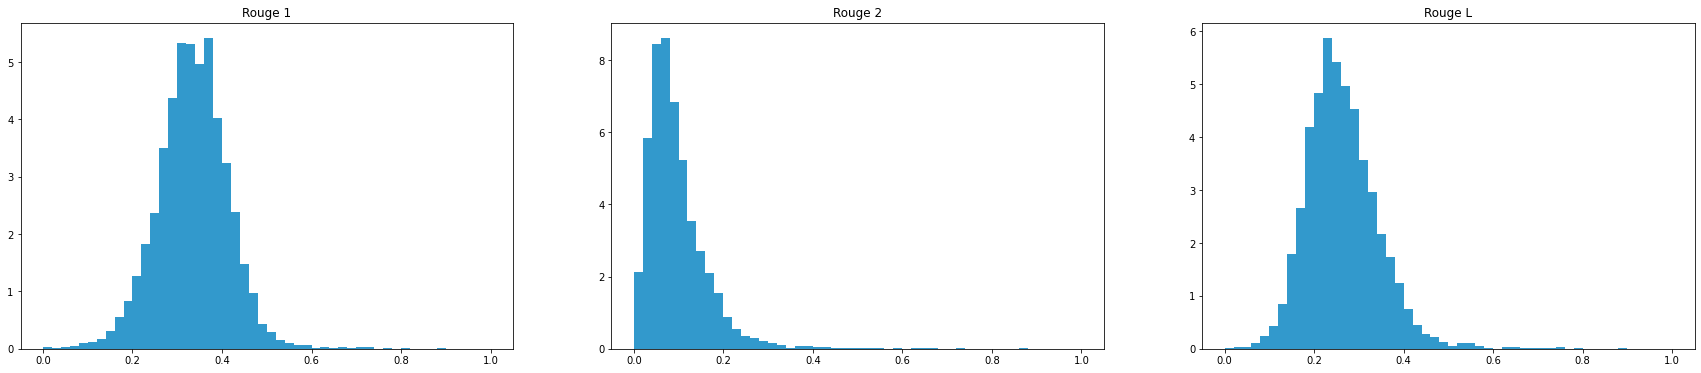

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(30,6))
ax1.set_title("Rouge 1")
ax2.set_title("Rouge 2")
ax3.set_title("Rouge L")
_ = ax1.hist(hist_1,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax2.hist(hist_2,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax3.hist(hist_l,bins=50,range=(0,1),density=True,color="#3299CC")